In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_excel('/content/drive/MyDrive/adult.xlsx')
data.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country Income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

## Basic understanding

In [4]:
data.shape

(48842, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  Income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
data.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

## Data cleaning

In [7]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(29)

In [9]:
#Dropping duplicates
data.drop_duplicates(inplace=True, ignore_index=True)

In [11]:
data.duplicated().sum()

np.int64(0)

In [12]:
data['age']=data['age'].astype(int)

In [13]:
# checking for anomalies in the categorical columns
cat = data.select_dtypes(include=object).columns.to_list()
num = data.select_dtypes(include=np.number).columns.to_list()

In [14]:
for i in cat:
    print(i)
    print(data[i].nunique())
    print('-------------------------------------------')

workclass
9
-------------------------------------------
education
16
-------------------------------------------
marital-status
7
-------------------------------------------
occupation
15
-------------------------------------------
relationship
6
-------------------------------------------
race
5
-------------------------------------------
sex
2
-------------------------------------------
native-country
42
-------------------------------------------
Income
4
-------------------------------------------


In [15]:
for i in cat:
    print(i)
    print(data[i].value_counts())
    print('-------------------------------------------')

workclass
workclass
Private             33879
Self-emp-not-inc     3861
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
-------------------------------------------
education
education
HS-grad         15777
Some-college    10869
Bachelors        8020
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              656
Doctorate         594
5th-6th           508
1st-4th           245
Preschool          82
Name: count, dtype: int64
-------------------------------------------
marital-status
marital-status
Married-civ-spouse       22372
Never-married            16098
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse 

<font size=3px color='magenta'> There exists '?', wherever the value is unknown/ other, hence replacing '?' with 'other'

<font size=3px color='magenta'> And the target column income contains two fifferent entries for the same data i.e. 50K and 50K.

In [16]:
for i in cat:
    if i != 'occupation':
        data[i] = data[i].str.replace('?','other')
data['occupation'] = data['occupation'].str.replace('?','Other-service')

In [17]:
data['Income'] = data['Income'].str.replace('.','')

In [18]:
for i in cat:
    print(i)
    print(data[i].value_counts())
    print('-------------------------------------------')

workclass
workclass
Private             33879
Self-emp-not-inc     3861
Local-gov            3136
other                2799
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
-------------------------------------------
education
education
HS-grad         15777
Some-college    10869
Bachelors        8020
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              656
Doctorate         594
5th-6th           508
1st-4th           245
Preschool          82
Name: count, dtype: int64
-------------------------------------------
marital-status
marital-status
Married-civ-spouse       22372
Never-married            16098
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse 

## checking for outliers

In [19]:
plt.rcParams['figure.figsize'] = [20,10]

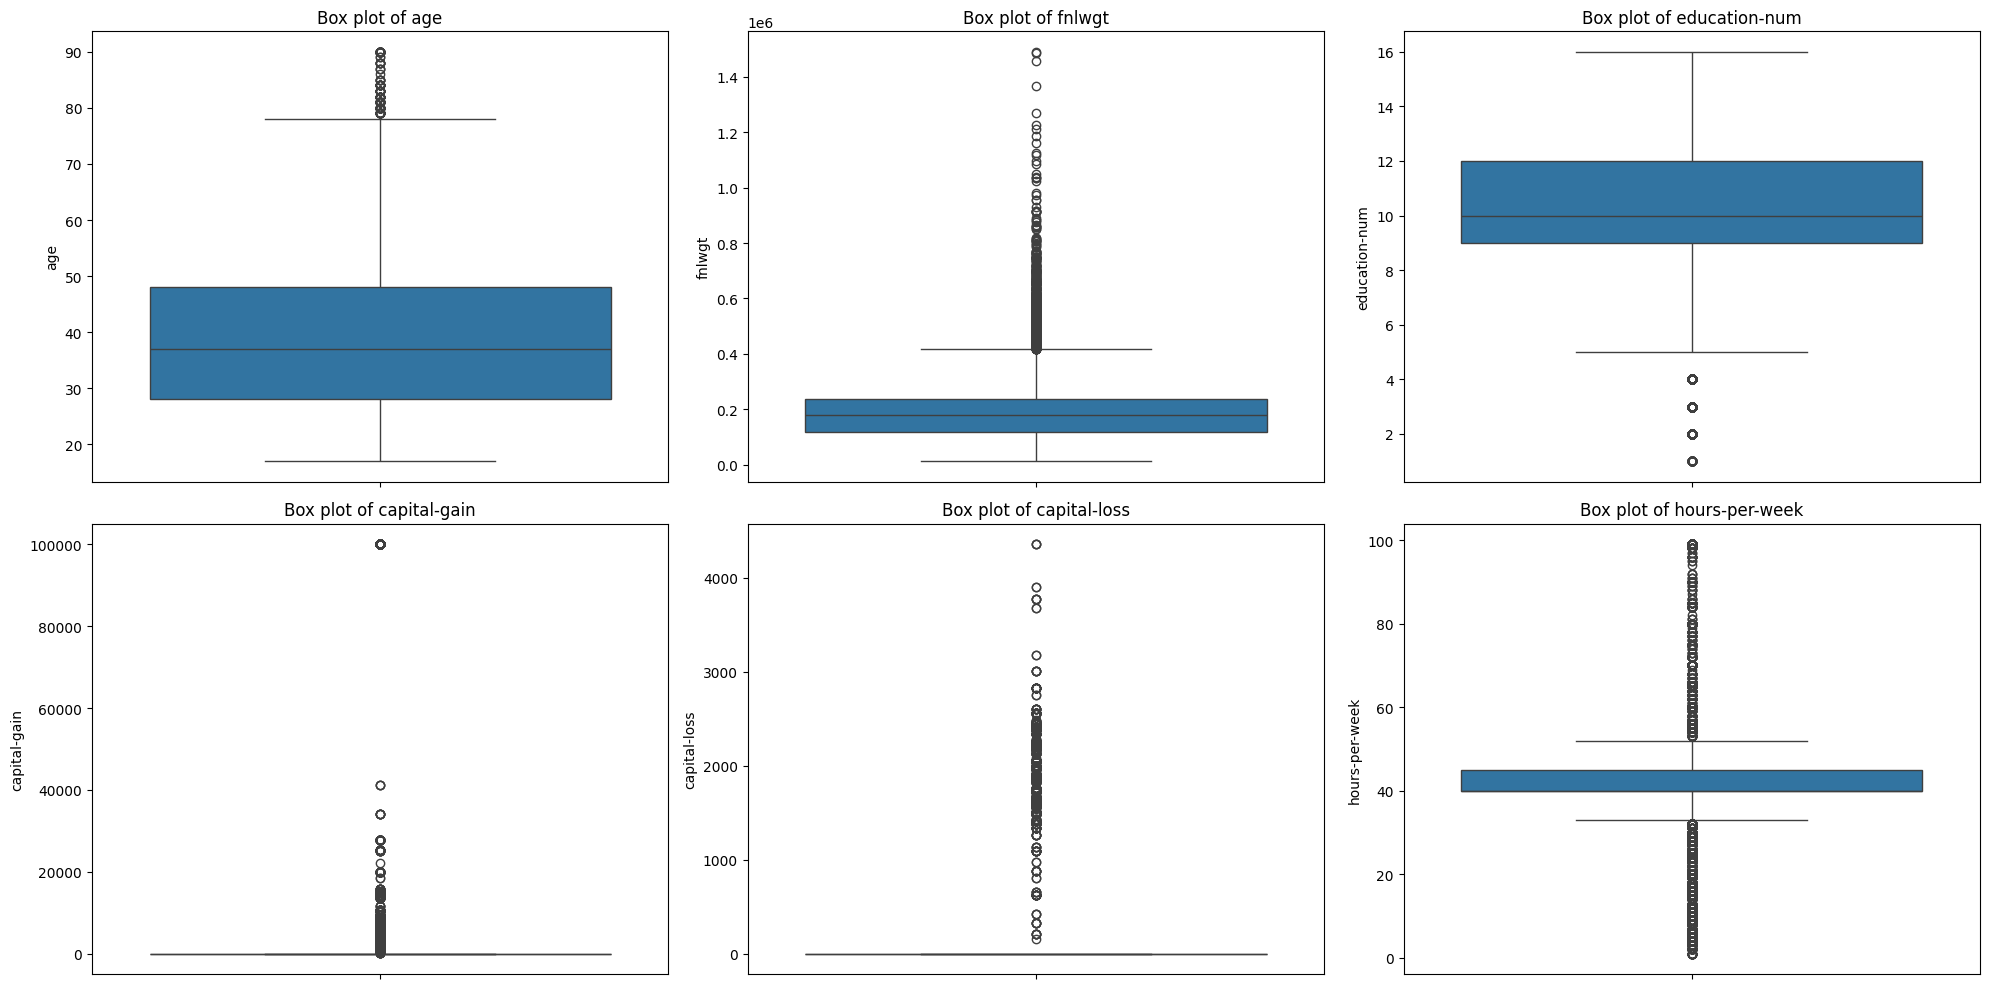

In [115]:
t = 1
for i in num:
    plt.subplot(2,3,t)
    sns.boxplot(data[i])
    plt.title(f'Box plot of {i}')
    t+=1
plt.tight_layout()
plt.show()

## Inference

The boxplot for age shows a few high-end outliers.
Using the IQR method, these outliers lie above the upper whisker (Q3 + 1.5×IQR).
These points represent older individuals in the data and may skew the mean

The fnlwgt column shows many outliers in both directions.
This variable naturally has a very wide distribution.
Although the values represent census weights and are not errors,
they are extreme enough to affect model training.

The boxplot for education-num is fairly compact with minimal outliers.
Most values fall within a normal range, indicating a consistent pattern of education levels.
No major outlier impact.

The capital-gain variable shows heavy right-skew with many outliers at high values.
Only a small number of individuals report significant gains, creating large upper outliers.

Similar to capital-gain, capital-loss shows a right-skewed distribution with a few upper outliers.
These values represent legitimate but extreme losses.

The hours-per-week column has mild outliers at both ends.
Some individuals work extremely low or extremely high hours.
These outliers can influence regression/ML models.

In [116]:
q1 = data[num].quantile(0.25)
q3 = data[num].quantile(0.75)
iqr = q3 - q1

lower_whis = q1 - (1.5*iqr)
upper_whis = q3 + (1.5*iqr)

outliers = data[((data[num] < lower_whis) | (data[num] > upper_whis)).any(axis = 1)]

In [117]:
len(outliers)/len(data)*100

41.52992030811464


***Since we have nearly 41.43 % of outliers(potential) we can't ignore them for the analysis. We may treat those columns later using transformation.***

# Deep analysis (Visualization)

***1. Univariate analysis*** - Num

In [118]:
df = data.copy()

In [119]:
df[num].skew()

age                0.556775
fnlwgt             1.439534
education-num     -0.315007
capital-gain      11.891093
capital-loss       4.568263
hours-per-week     0.239643
dtype: float64

In [120]:
df[num].kurt()

age                -0.186807
fnlwgt              6.061109
education-num       0.622937
capital-gain      152.600448
capital-loss       19.999613
hours-per-week      2.951859
dtype: float64

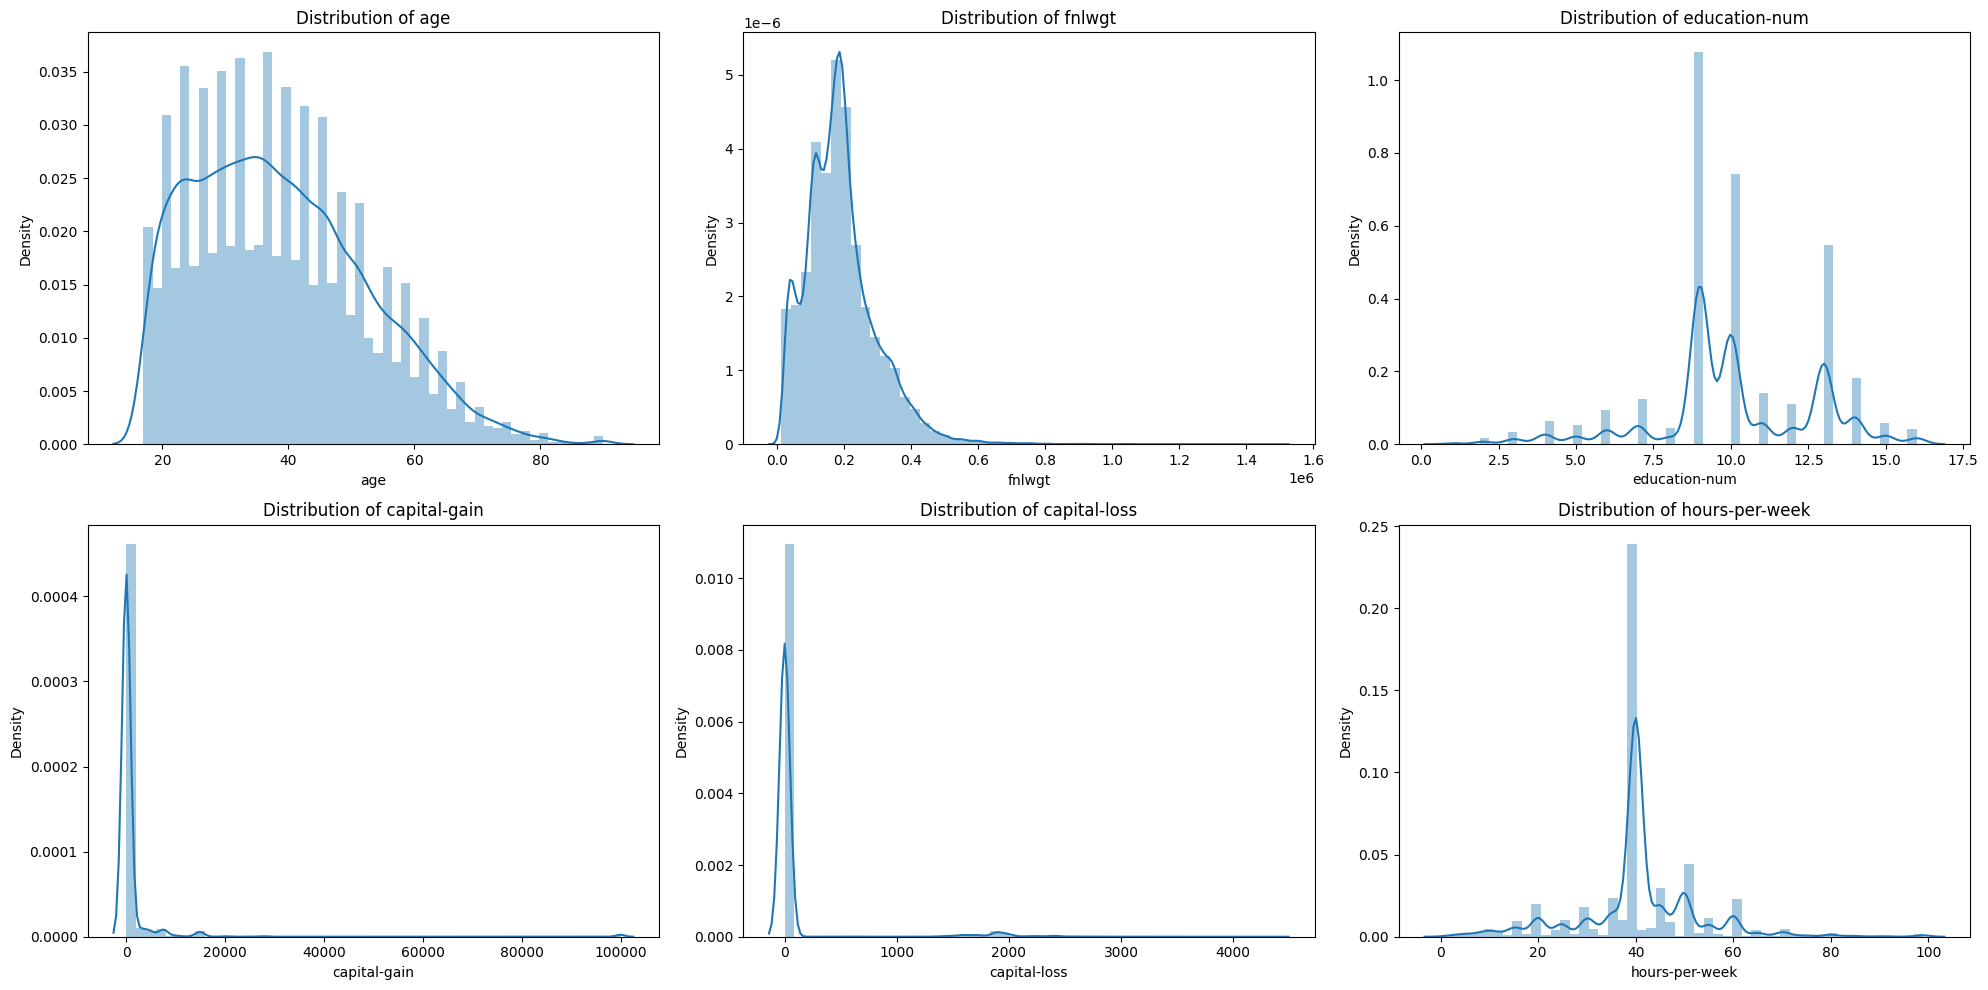

In [121]:
t=1
for i in num:
    plt.subplot(2,3,t)
    sns.distplot(df[i])
    plt.title(f'Distribution of {i}')
    t+=1
plt.tight_layout()
plt.show()

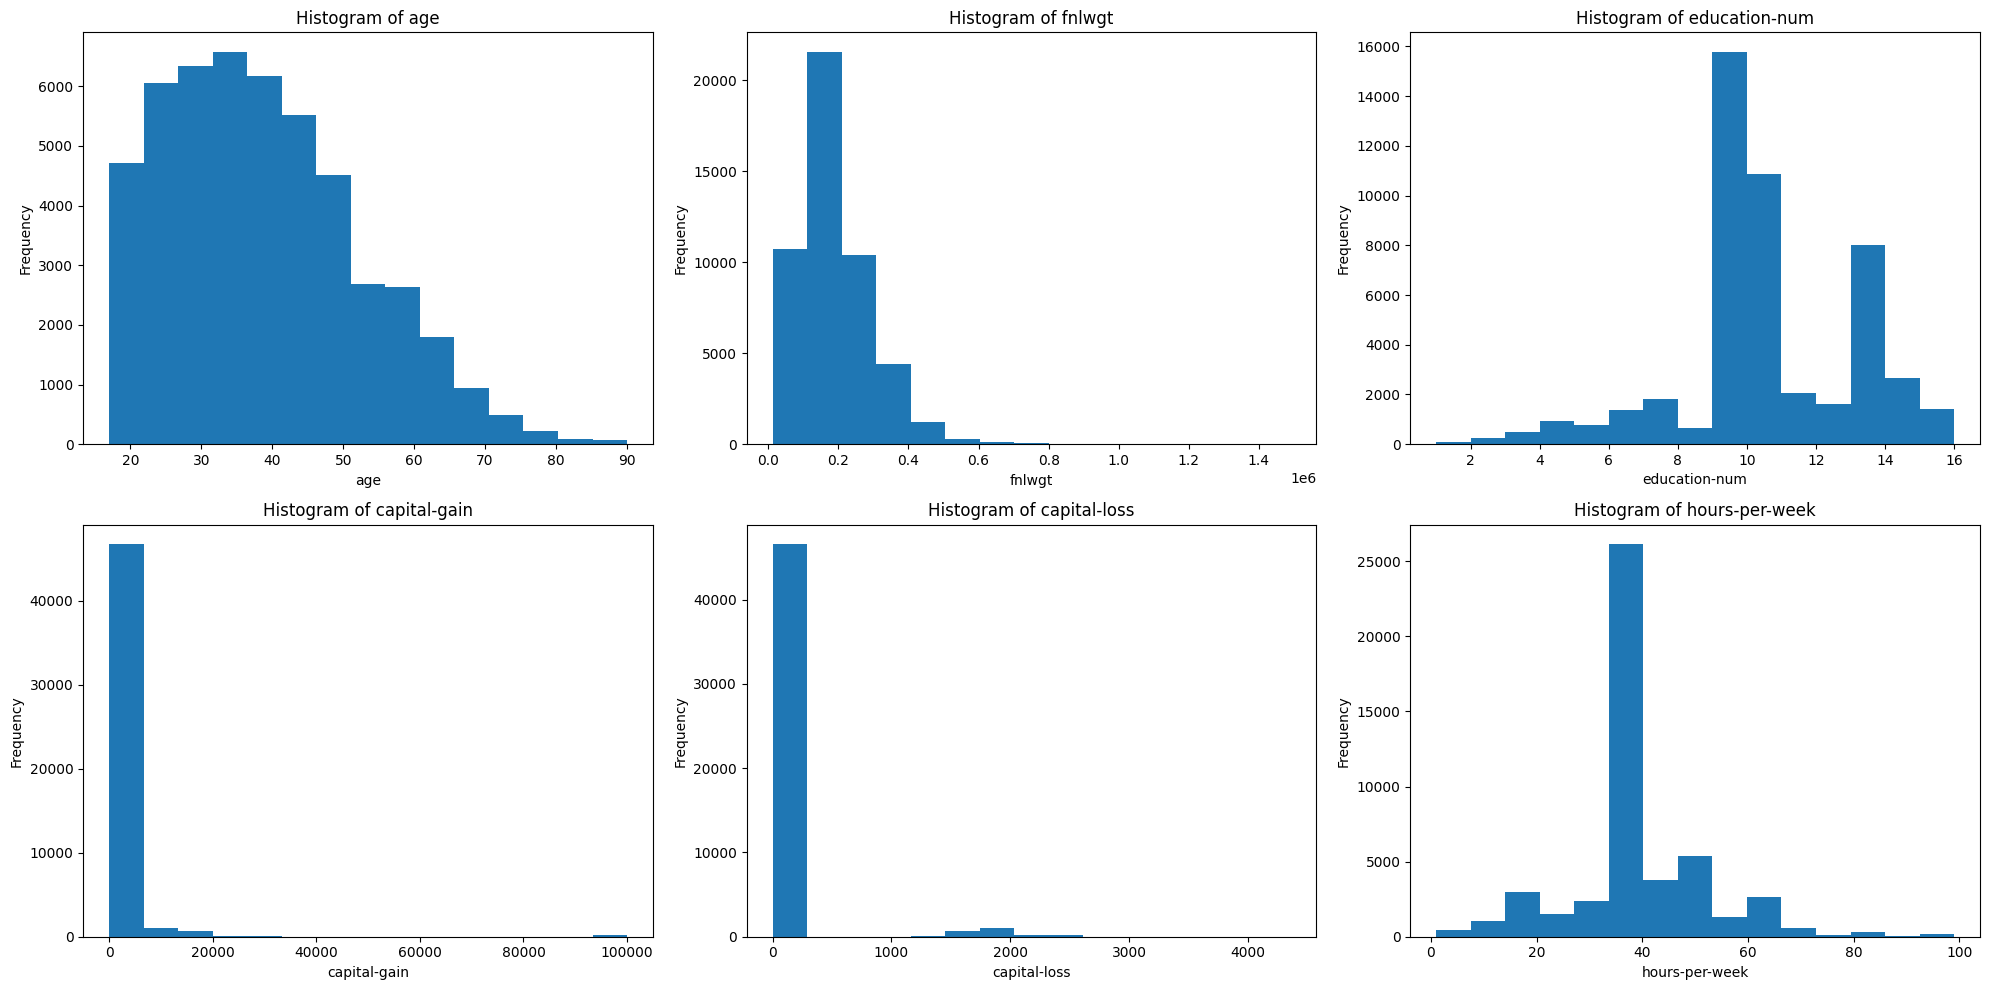

In [122]:
t=1
for col in num:
    plt.subplot(2,3,t)
    plt.hist(df[col], bins=15)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    t+=1
plt.tight_layout()
plt.show()

Inference

* Age:
Mostly concentrated between 20–50 years.
Slightly right-skewed; fewer older individuals.
Median around 37–38 years.

* fnlwgt:
Wide range of values.
Distribution is right-skewed; some extreme high values.
Represents population weights; outliers are expected.

* Education-num:
Most values between 9–13 (High school to some college).
Nearly symmetric distribution.

* Capital-gain:
Highly right-skewed; most people have zero gain.
Few individuals with extremely high gains.

* Capital-loss:
Highly right-skewed; most people have zero loss.
Extreme outliers exist but rare.

* Hours-per-week:
Mostly around 40 hours/week.
Mild right-skew; some work >60 hours/week.

***2. Univariate analysis*** - cat

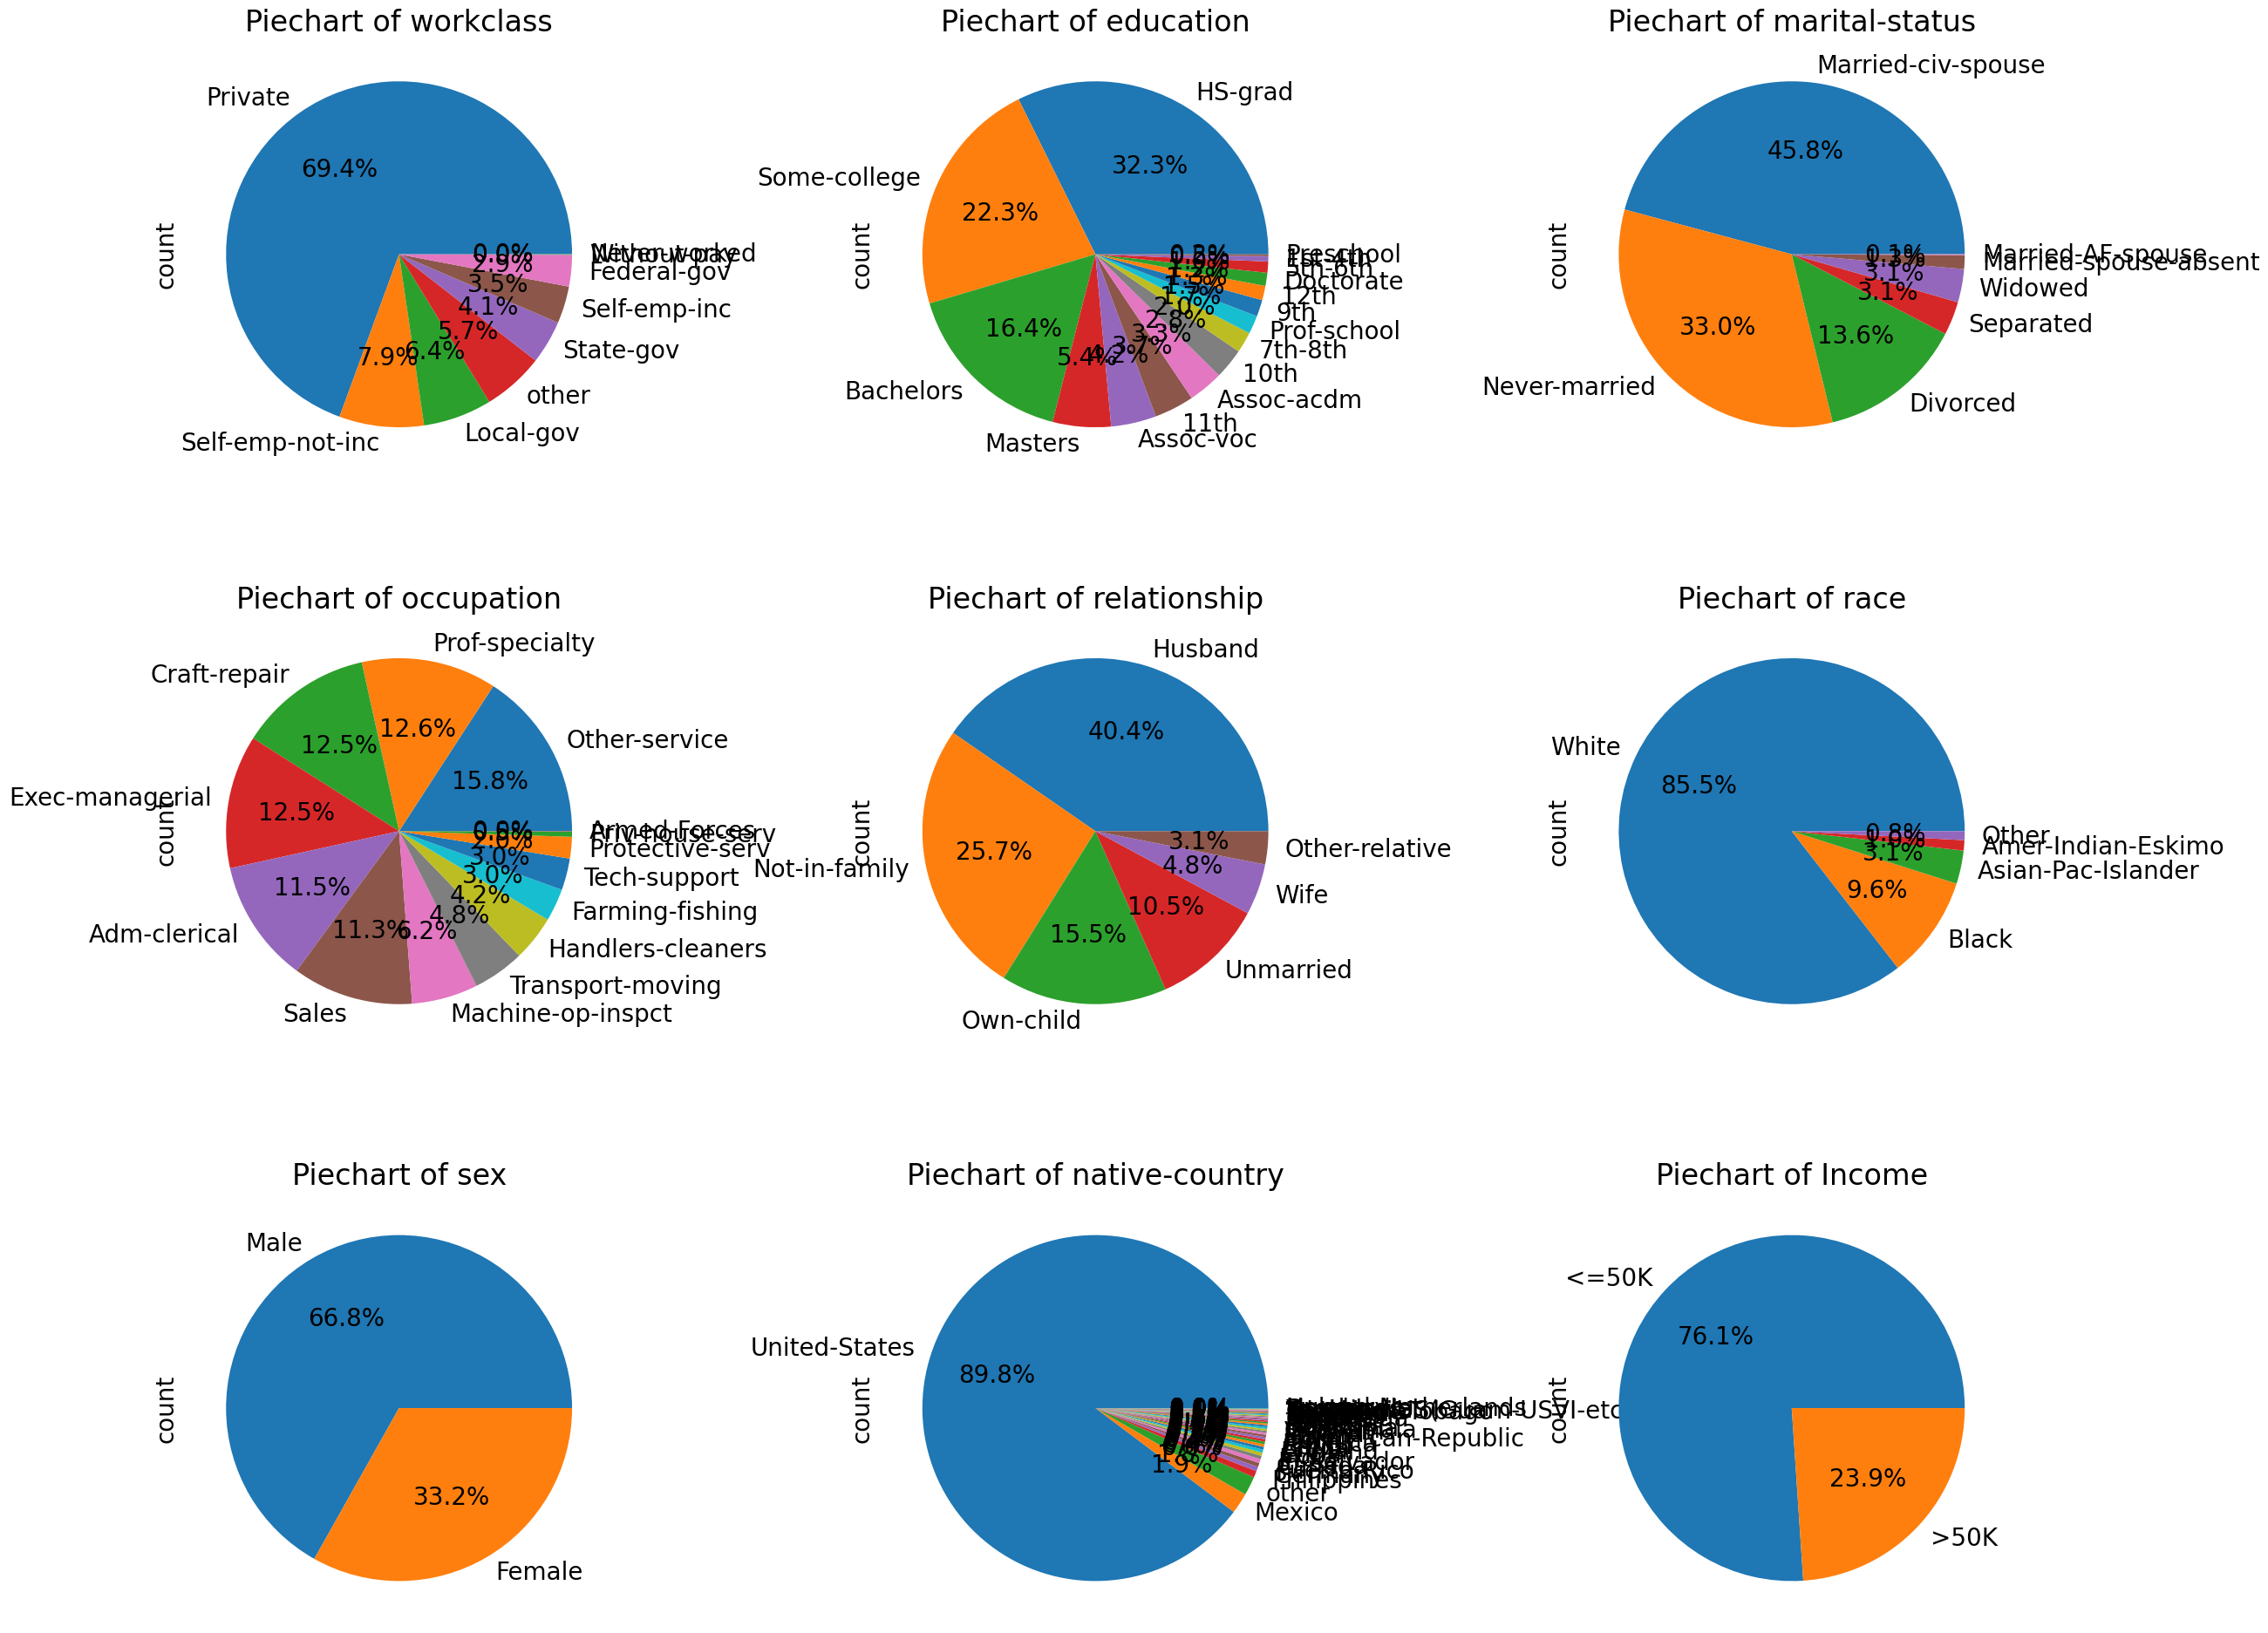

In [123]:
t = 1
with plt.rc_context({'font.size': 20, 'figure.figsize': (25, 20)}):
    for i in cat:
        plt.subplot(3,3,t)
        df[i].value_counts().plot(kind='pie',autopct = '%.1f%%')
        plt.title(f'Piechart of {i}')
        t+=1
plt.tight_layout()
plt.show()

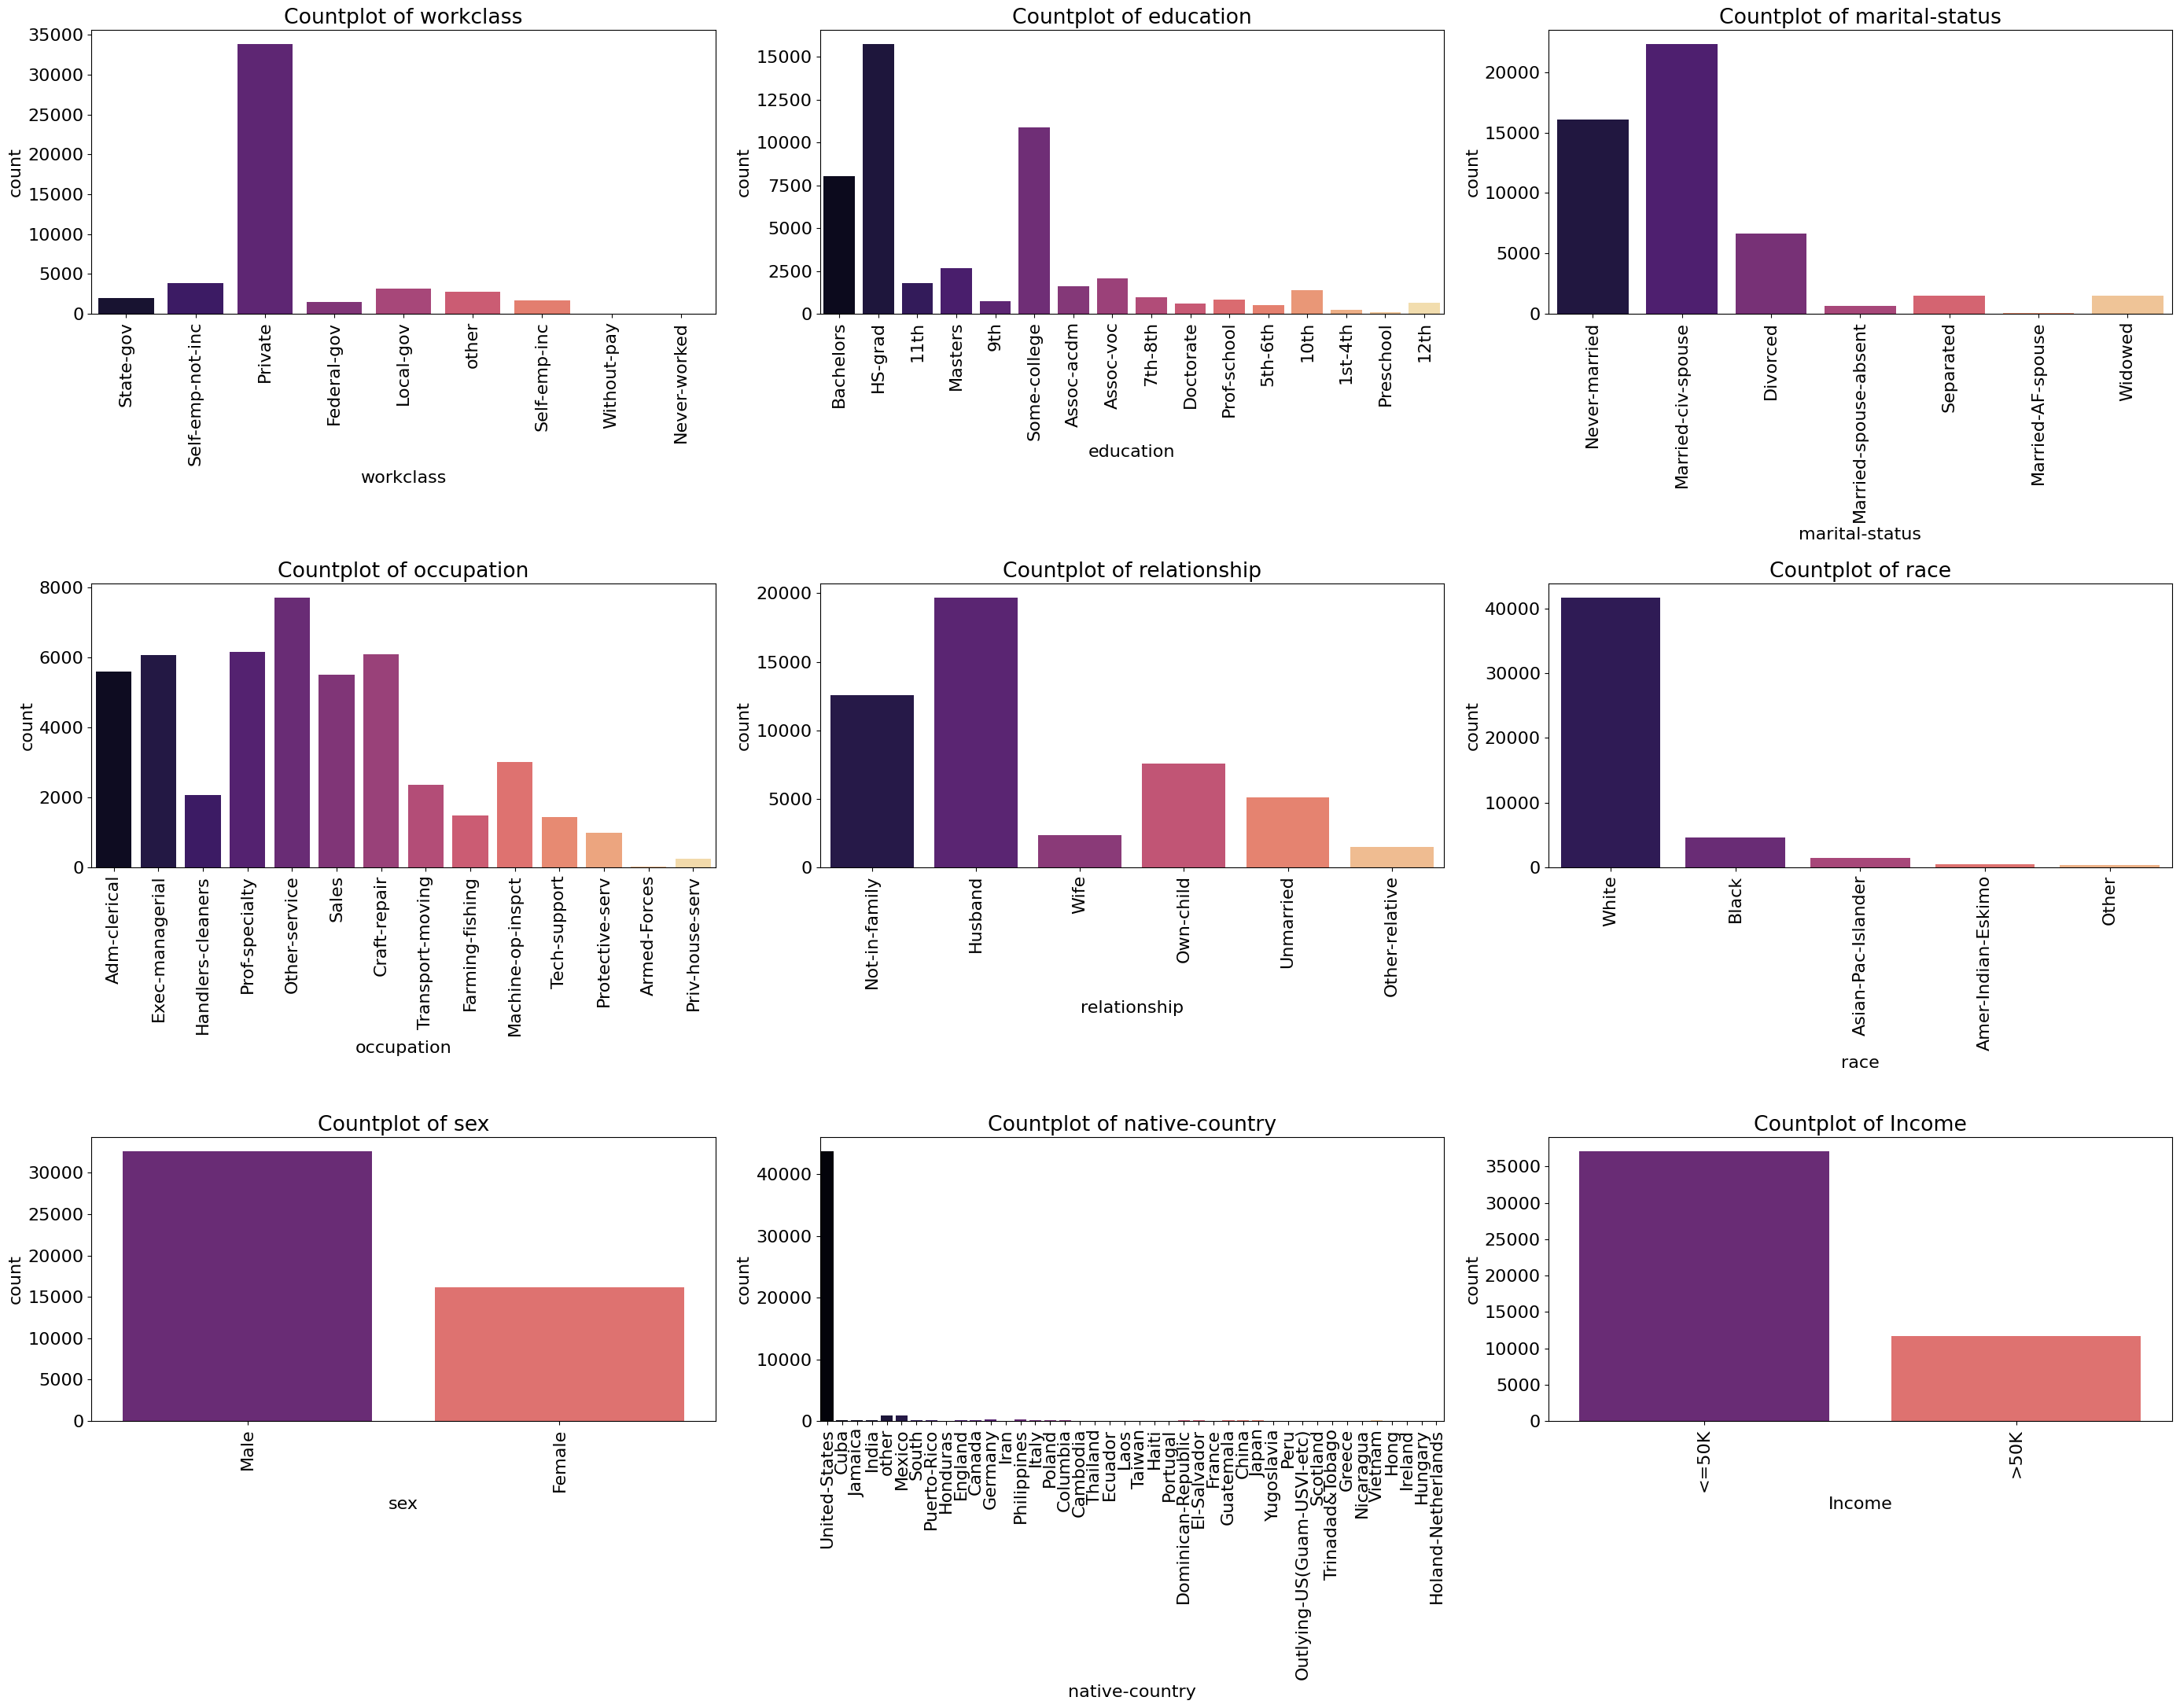

In [124]:
with plt.rc_context({'font.size': 16, 'figure.figsize': (28, 22)}):
    t = 1
    for i in cat:
        plt.subplot(3, 3, t)
        sns.countplot(x=df[i], palette='magma')
        plt.title(f'Countplot of {i}')

        # Rotate x-axis labels vertically
        plt.xticks(rotation=90)

        t += 1

    plt.tight_layout()
    plt.show()

##### Inference:

In the above analysis,  
* Majority of data are in private work class
* Majority of data contains United States as native country
* More male in the data than female
* as of race there exists more white people in the data
* majority are earning <=50K

## Inference


Workclass
Majority are Private.
Few in Self-emp or Government.
Never-worked or Without-pay categories are rare.

Education
Most common: HS-grad, followed by Some-college.
Few with Doctorate or Preschool.

Marital-status
Majority Married-civ-spouse.
Single and divorced categories follow.

Occupation
Most common: Prof-specialty and Craft-repair.
Rare categories: Farming-fishing, Armed-Forces.

Relationship
Majority Husband or Not-in-family.
Others less frequent.

Race
Predominantly White.
Minor representation: Black, Asian-Pac-Islander, Other.

Sex
Mostly Male.
Female representation lower.
    
Native-country
Majority from United-States.
Very few from other countries.

Income
Imbalanced; more <=50K than >50K.
Indicates income distribution skewed towards lower range.

***3. Bivariate analysis - Income vs other numeric variables***

In [125]:
t = 1
for i in num:
    print(f'Mean {i} for Income')
    print(df.groupby('Income')[i].mean())
    print('----------------------------')
    print()

Mean age for Income
Income
<=50K    36.875916
>50K     44.275909
Name: age, dtype: float64
----------------------------

Mean fnlwgt for Income
Income
<=50K    190045.660337
>50K     188467.622422
Name: fnlwgt, dtype: float64
----------------------------

Mean education-num for Income
Income
<=50K     9.598901
>50K     11.603166
Name: education-num, dtype: float64
----------------------------

Mean capital-gain for Income
Income
<=50K     147.117216
>50K     4042.931365
Name: capital-gain, dtype: float64
----------------------------

Mean capital-loss for Income
Income
<=50K     54.191311
>50K     193.562088
Name: capital-loss, dtype: float64
----------------------------

Mean hours-per-week for Income
Income
<=50K    38.842599
>50K     45.453145
Name: hours-per-week, dtype: float64
----------------------------



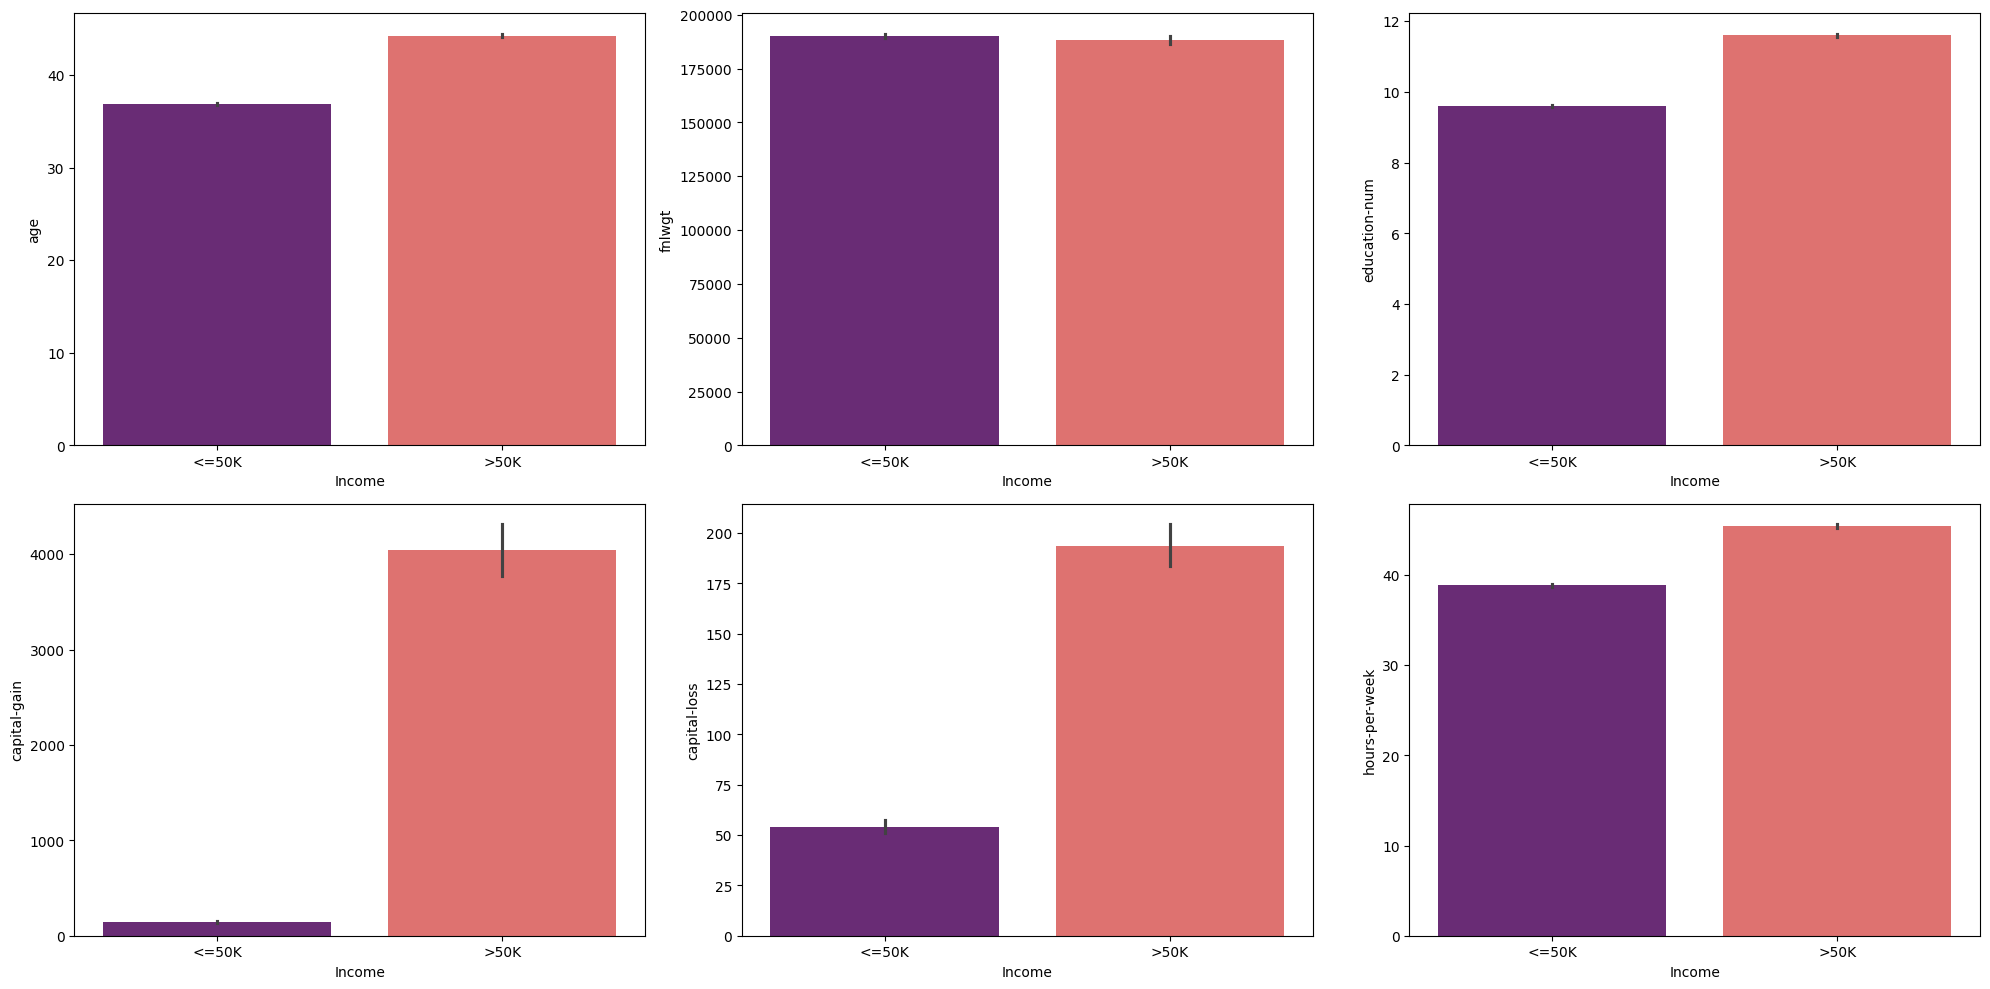

In [126]:
plt.rcParams['figure.figsize'] = [20,10]
t = 1
for i in num:
    plt.subplot(2,3,t)
    sns.barplot(x = df['Income'], y=df[i], palette='magma')
    t+=1
plt.tight_layout()
plt.show()

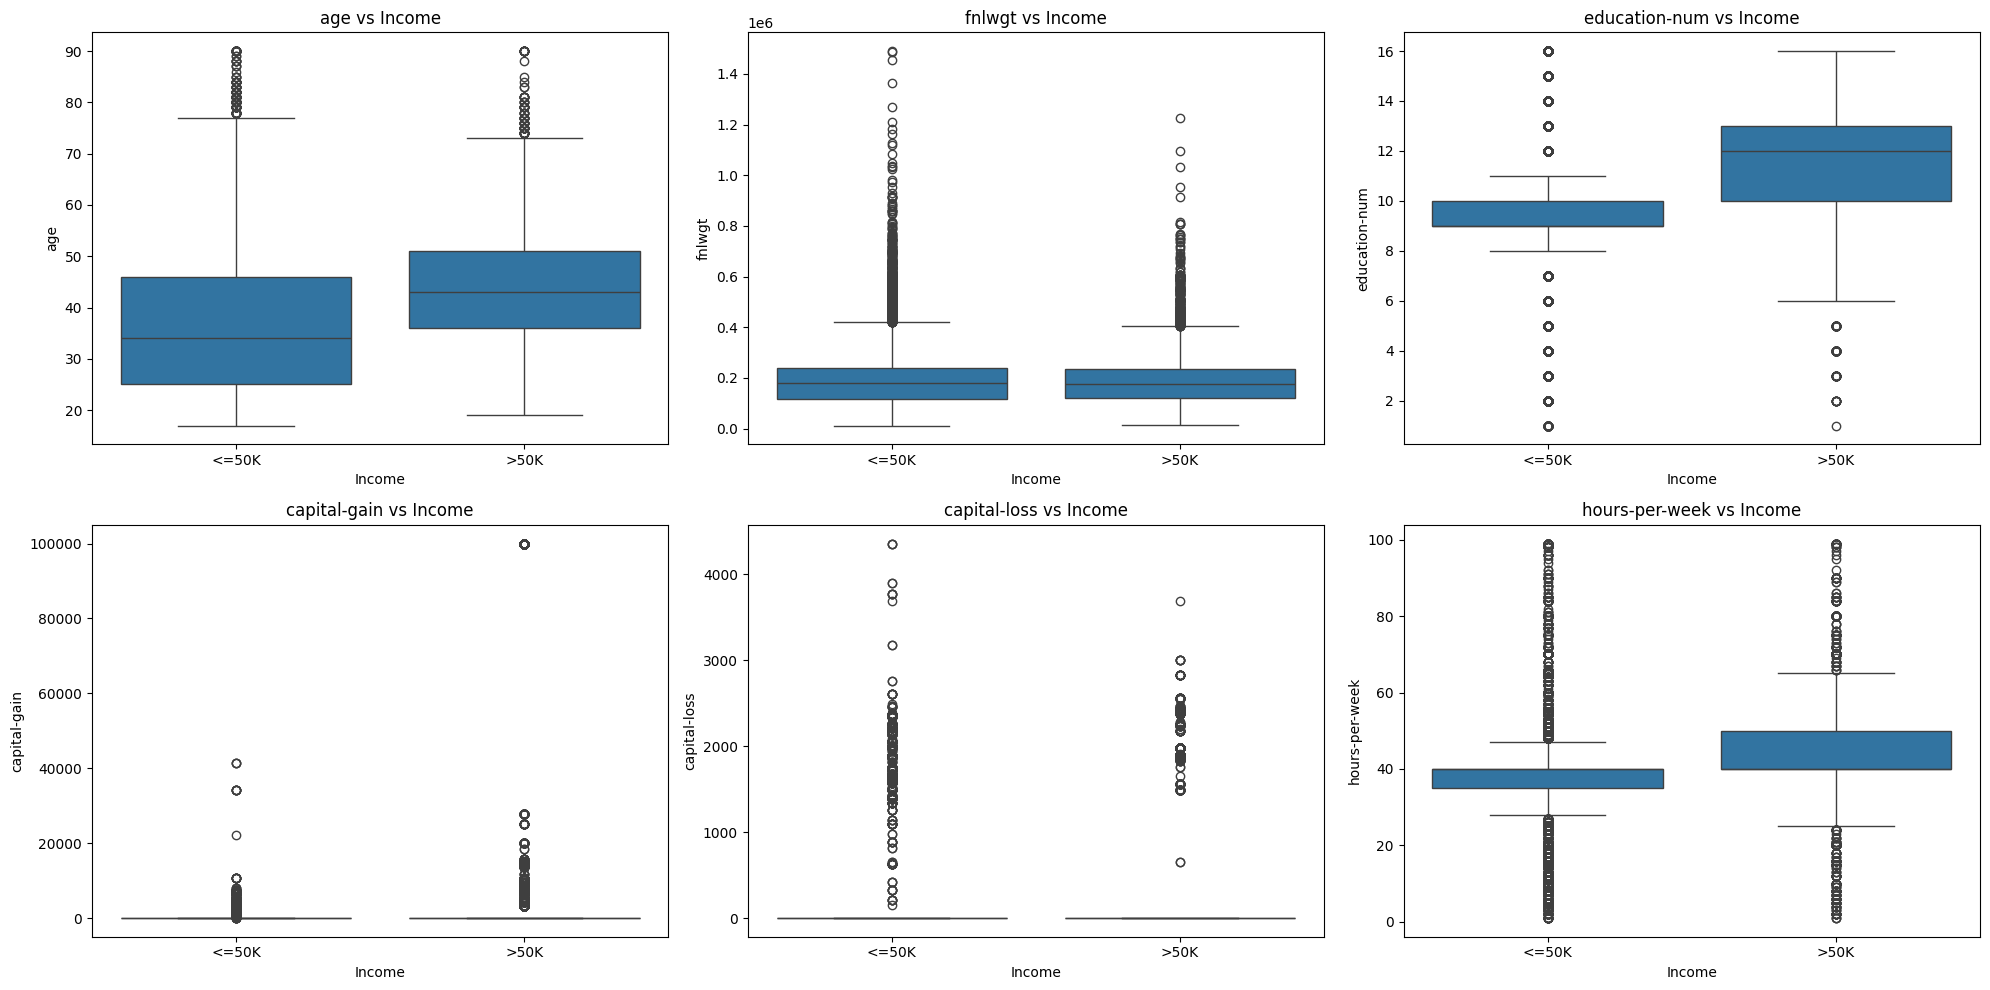

In [31]:
t=1
for col in num:
    plt.subplot(2,3,t)
    sns.boxplot(x='Income', y=col, data=df)
    plt.title(f'{col} vs Income')
    t+=1
plt.tight_layout()
plt.show()

In [32]:
for i in cat:
    print(f'frequency summary between Income and {i}')
    print(pd.crosstab(df['Income'], df[i]))
    print('---------------------------------')
    print()

frequency summary between Income and workclass
workclass  Federal-gov  Local-gov  Never-worked  Private  Self-emp-inc  \
Income                                                                   
<=50K              871       2209            10    26494           756   
>50K               561        927             0     7385           938   

workclass  Self-emp-not-inc  State-gov  Without-pay  other  
Income                                                      
<=50K                  2784       1451           19   2534  
>50K                   1077        530            2    265  
---------------------------------

frequency summary between Income and education
education  10th  11th  12th  1st-4th  5th-6th  7th-8th  9th  Assoc-acdm  \
Income                                                                    
<=50K      1302  1720   608      237      481      892  715        1188   
>50K         87    92    48        8       27       62   41         413   

education  Assoc-voc  Bachelo

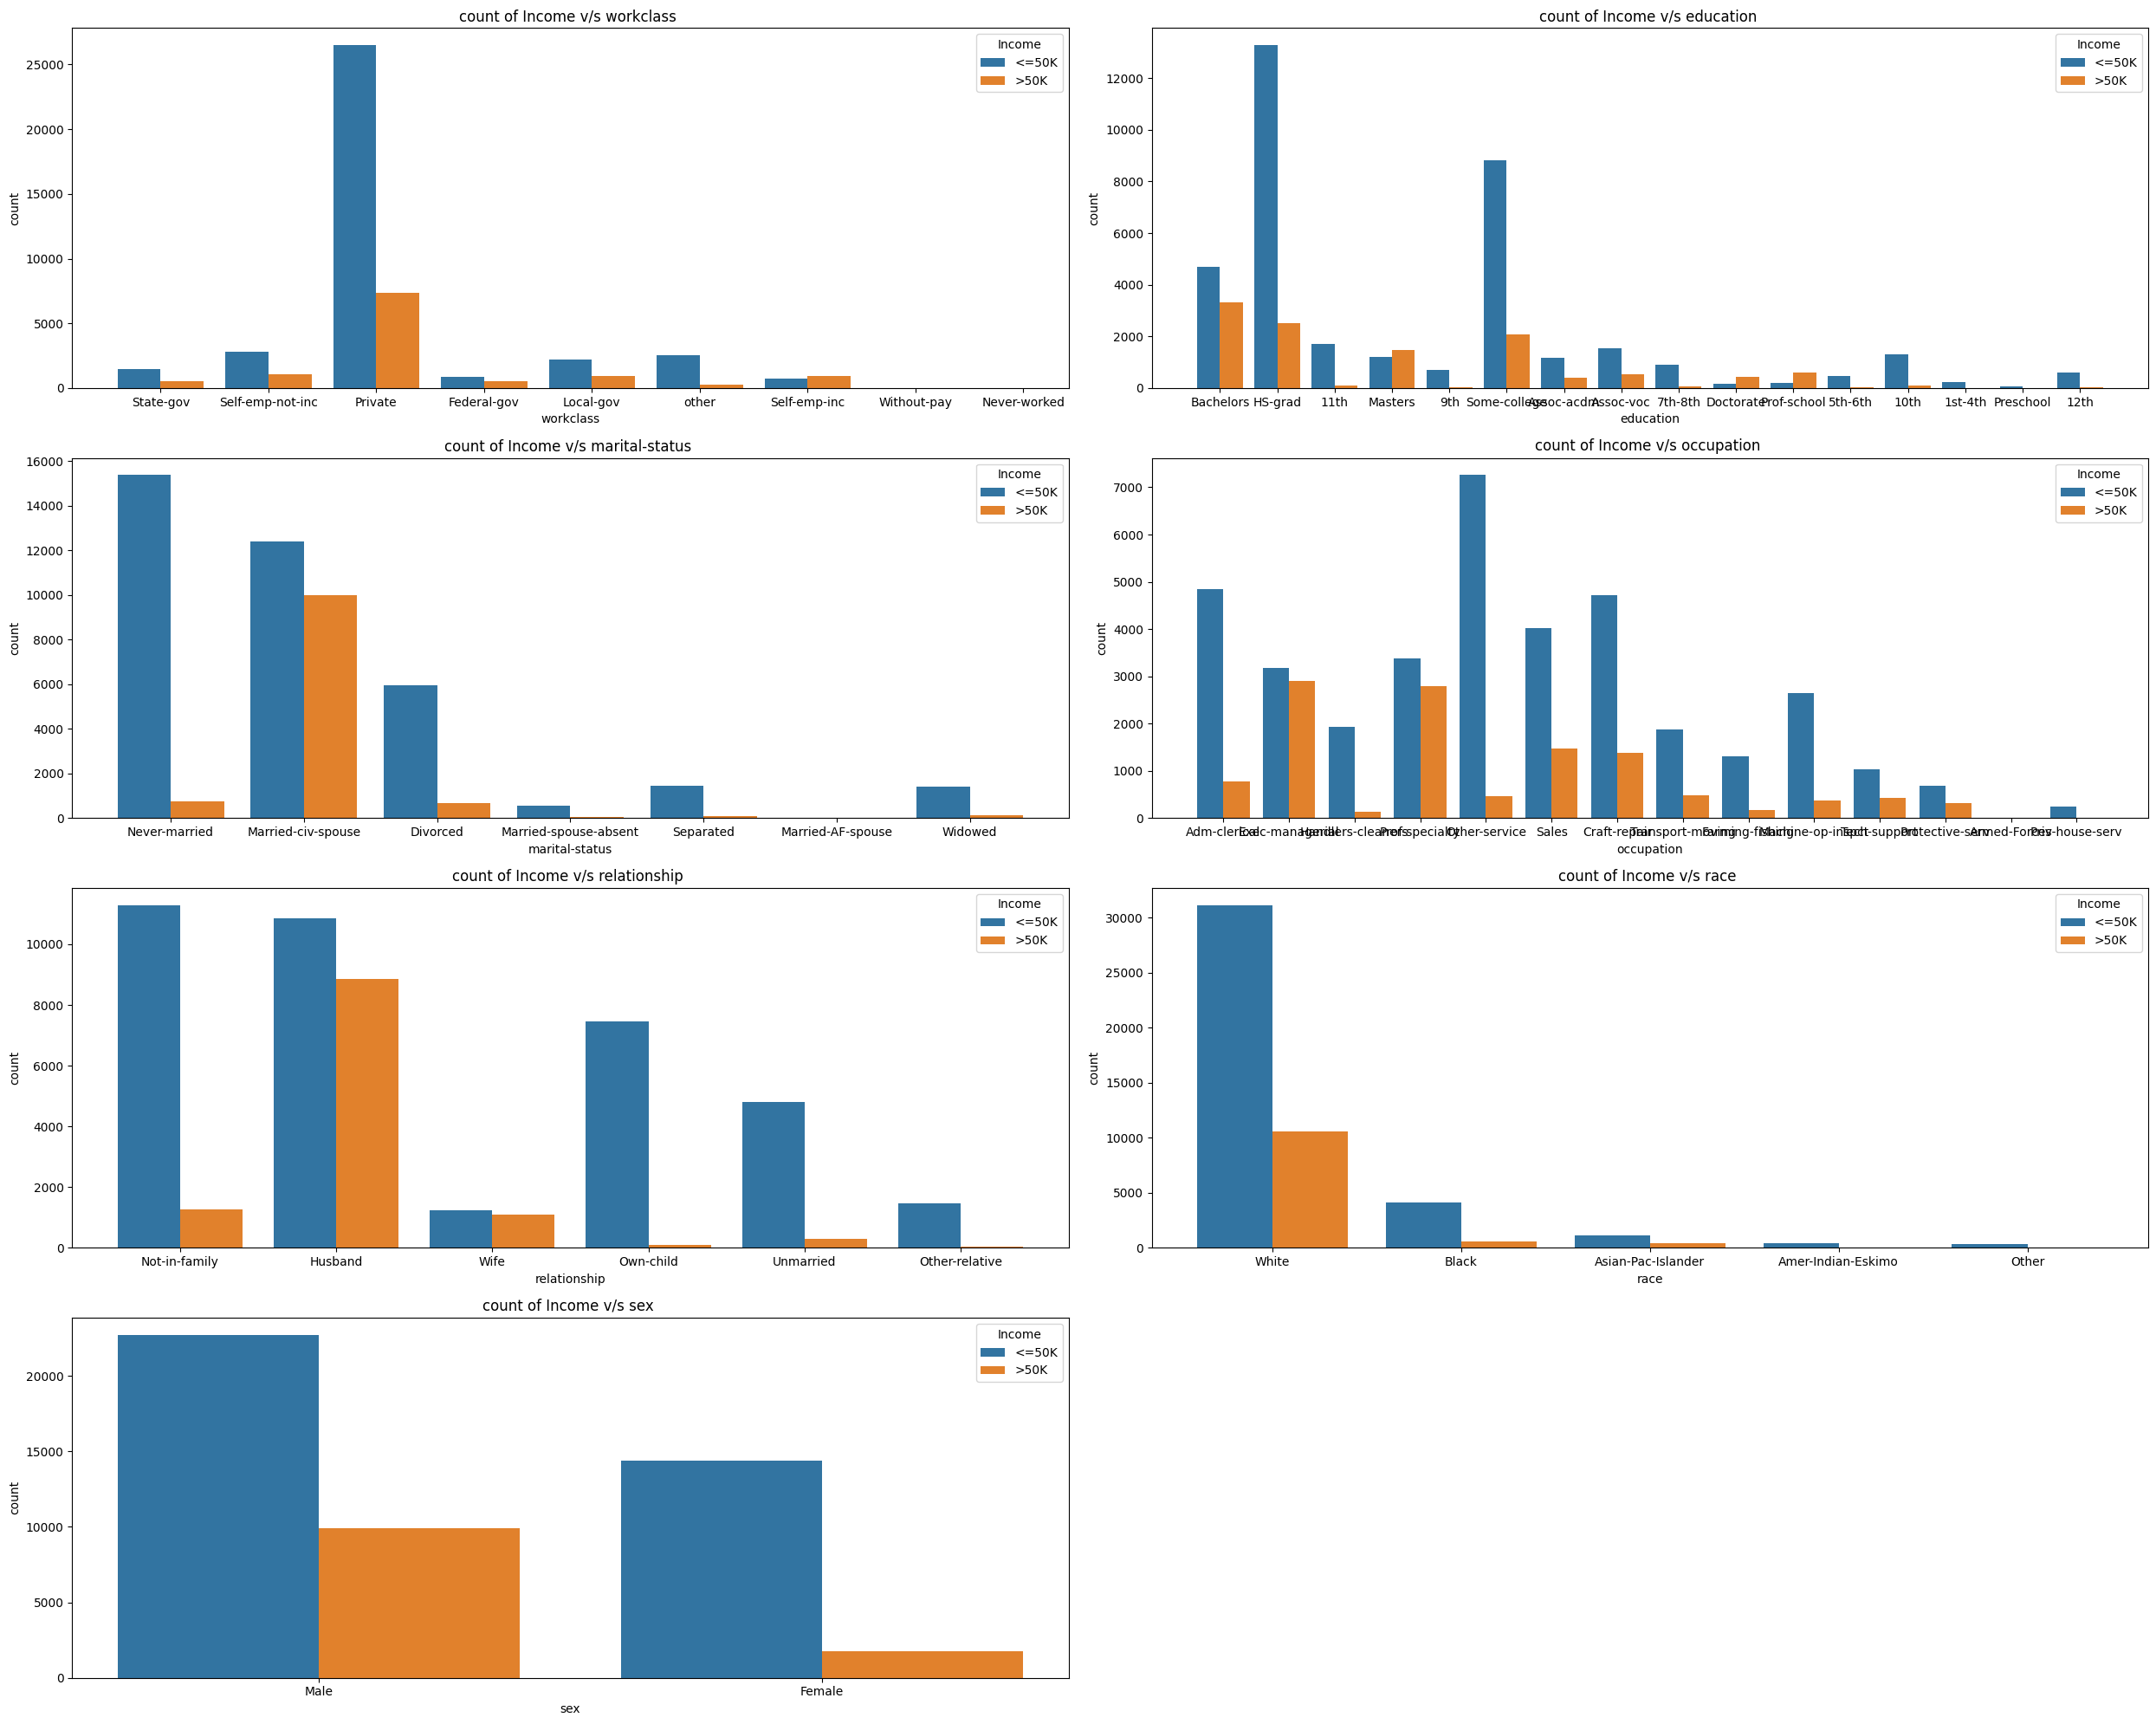

In [33]:
t = 1
with plt.rc_context({'font.size': 10, 'figure.figsize': (25, 20)}):
    for i in cat:
        if i not in ['Income','native-country']:
            plt.subplot(4,2,t)
            sns.countplot(x = df[i], hue = df['Income']).plot(kind='bar')
            plt.title(f'count of Income v/s {i} ')
            t+=1
plt.tight_layout()
plt.show()

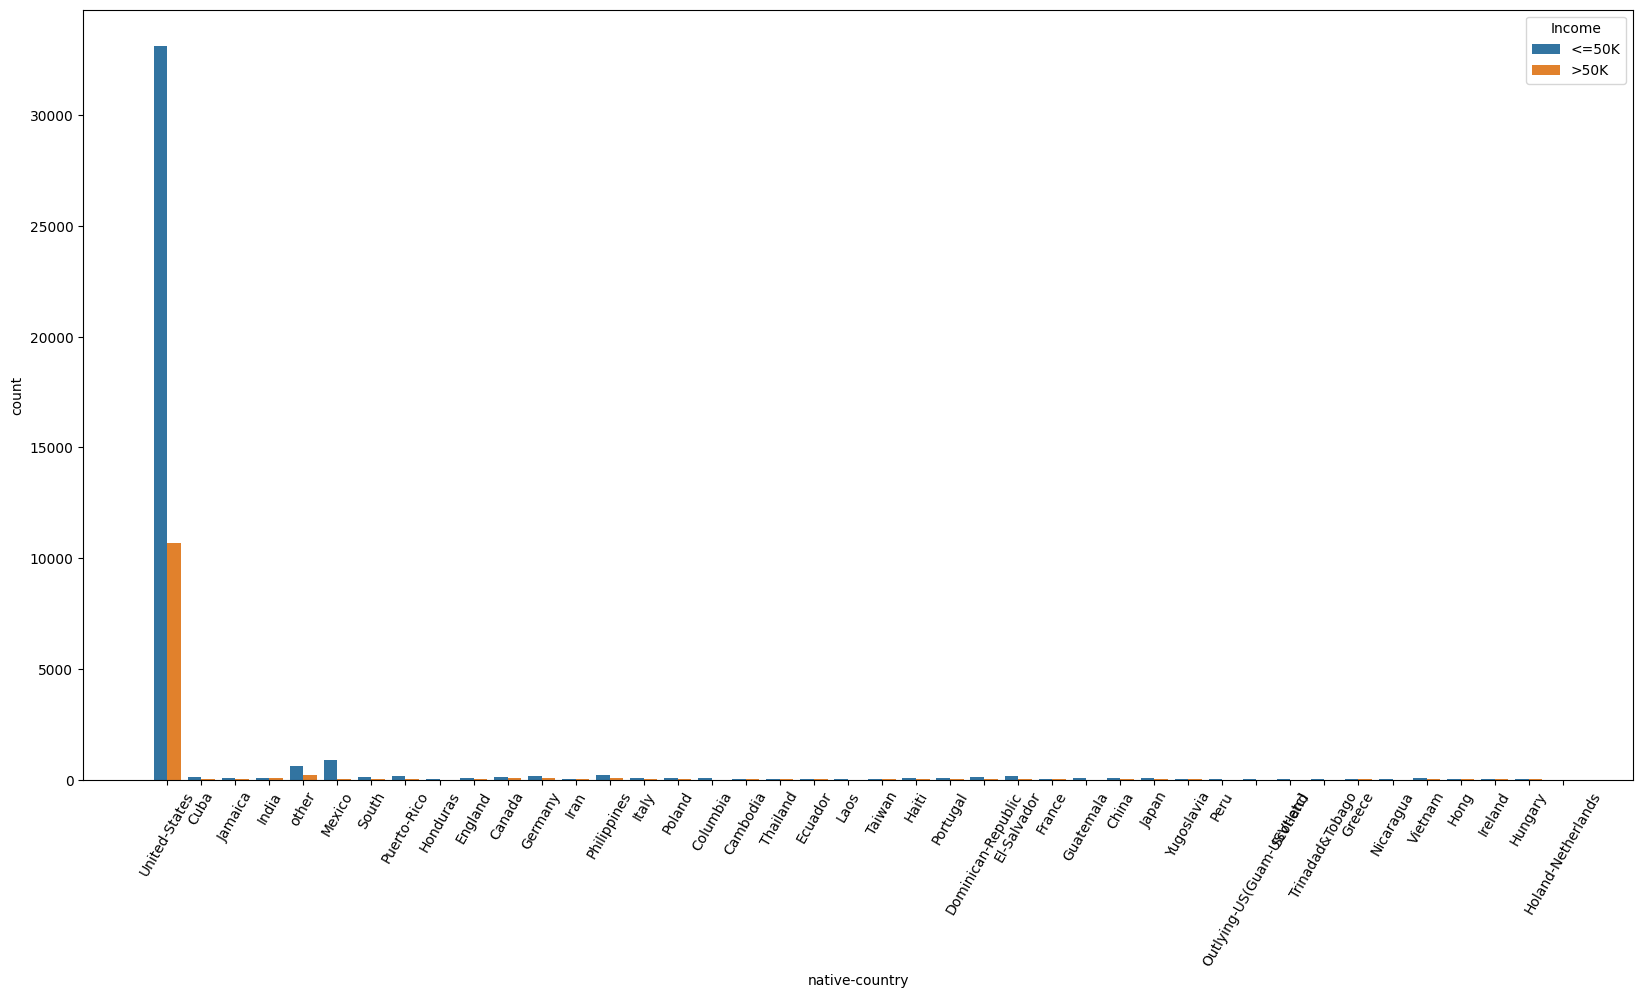

In [34]:
sns.countplot(x = df['native-country'], hue = df['Income']).plot(kind='bar')
plt.xticks(rotation=60)
plt.show()

<Axes: >

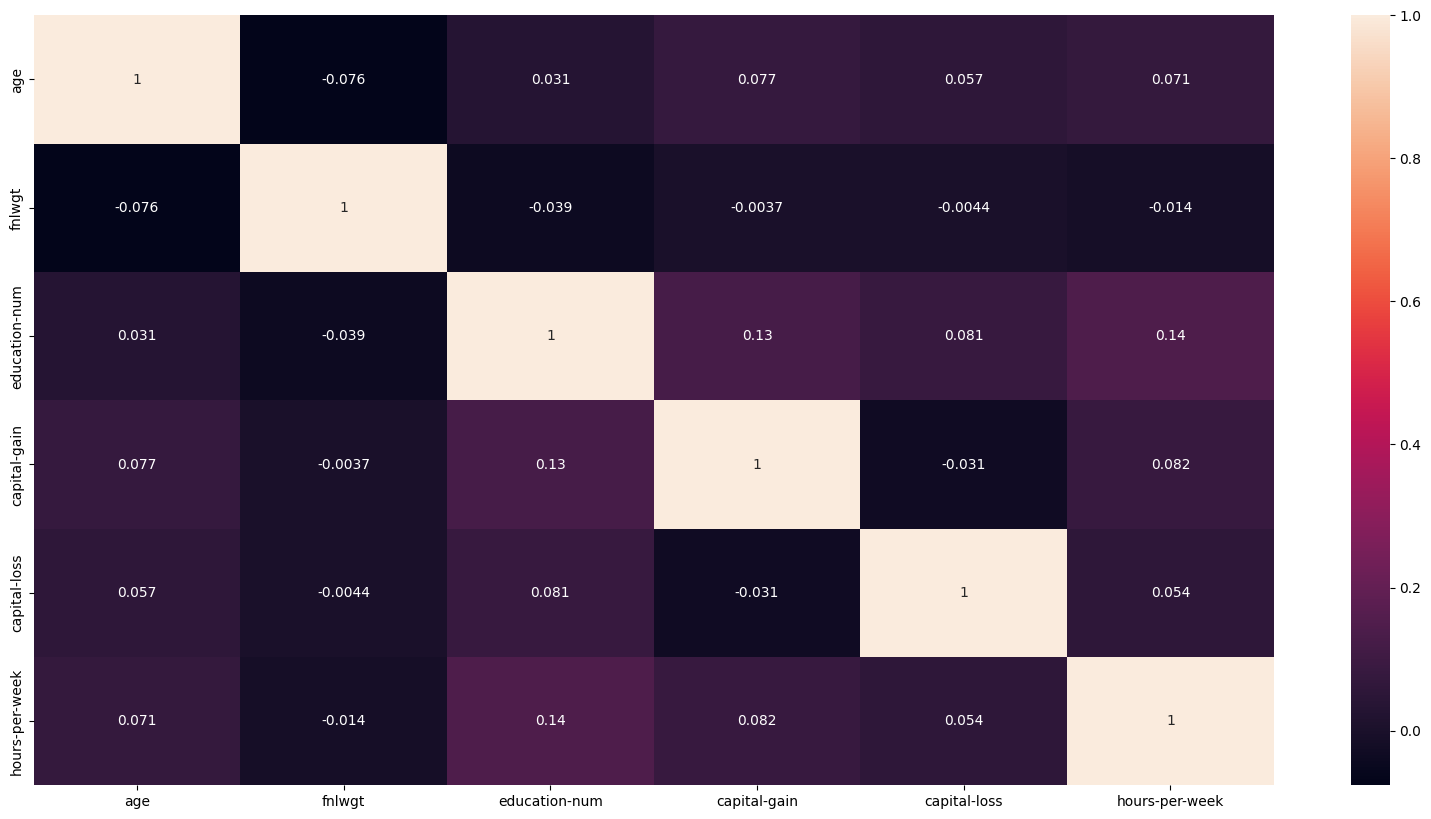

In [35]:
sns.heatmap(df[num].corr(),annot=True)

In [36]:
from pandas.plotting import scatter_matrix

In [37]:
SAMPLE_FOR_PAIRPLOT = 500
ML_SAMPLE_LIMIT = None # set to integer to sample for faster runs (e.g., 12000) or None to use full data
RANDOM_STATE = 42

Text(0.5, 0.98, 'Scatter matrix (sample)')

<Figure size 1000x1000 with 0 Axes>

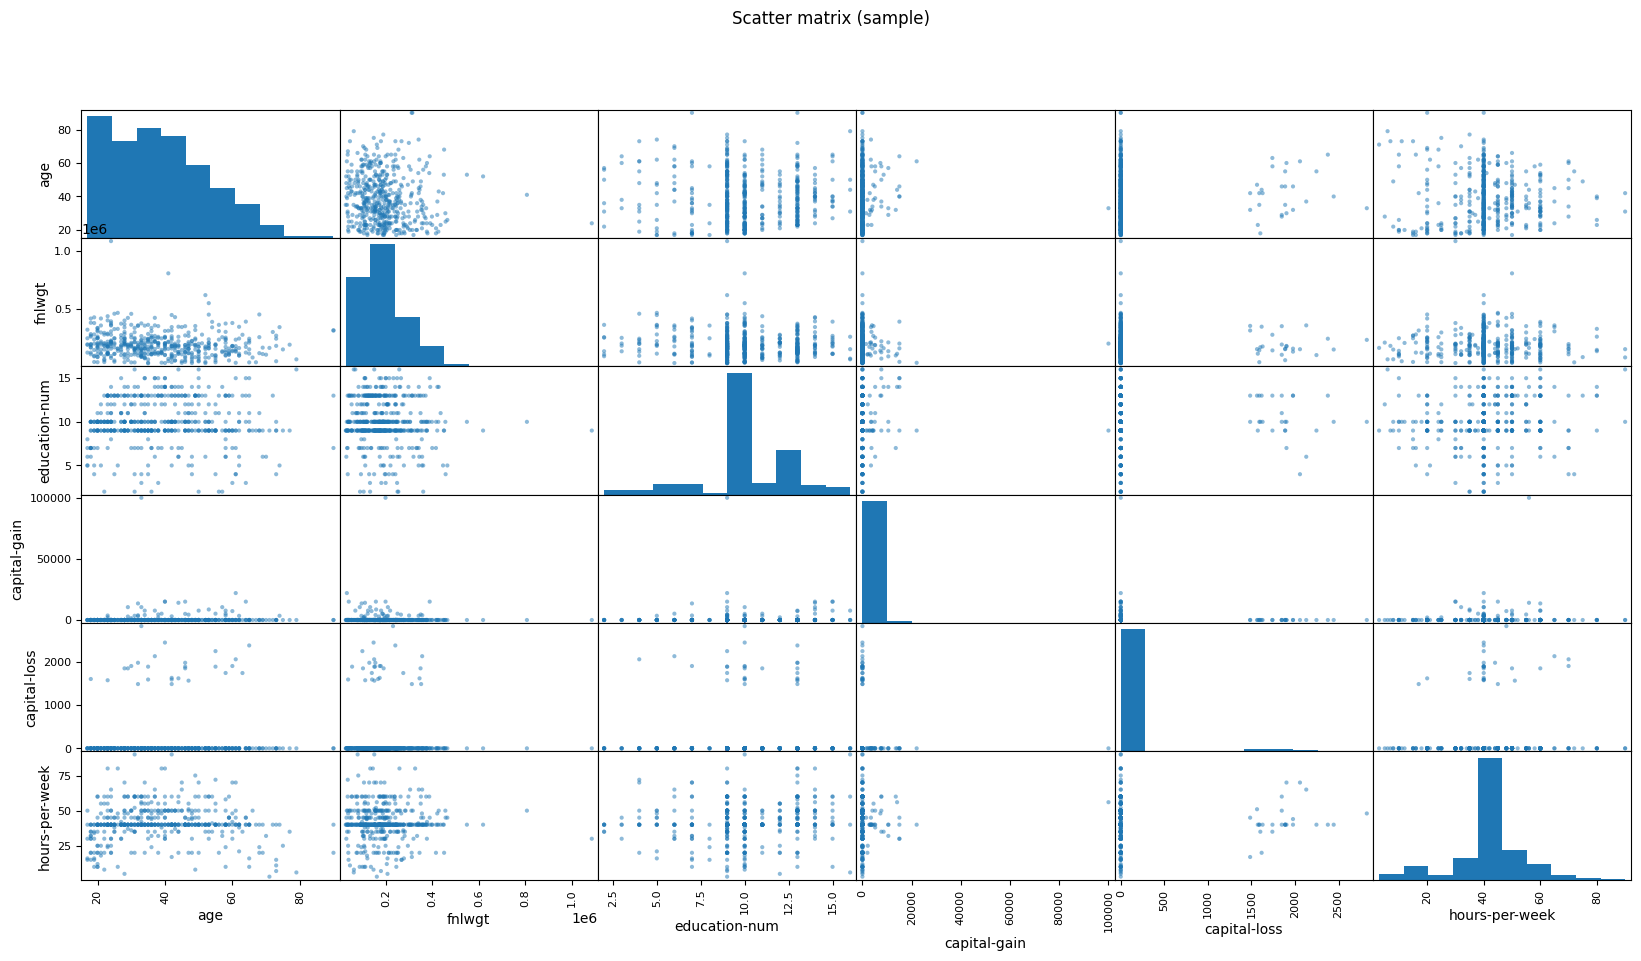

In [38]:
# Scatter matrix (sampled)

sample = data[num].dropna().sample(n=min(SAMPLE_FOR_PAIRPLOT, df.shape[0]), random_state=RANDOM_STATE)
fig = plt.figure(figsize=(10,10))
scatter_matrix(sample, figsize=(20,10))
plt.suptitle('Scatter matrix (sample)')

# Transformation

Log-transformation for capital-gain/loss to normalize the highly skewed distribution

In [39]:
data['capital-gain'] = np.log1p(data['capital-gain'])
data['capital-loss'] = np.log1p(data['capital-loss'])

In [40]:
data

age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48808   39           Private  215419  Bachelors             13   
48809   64             other  321403    HS-grad              9   
48810   38           Private  374983  Bachelors             13   
48811   44           Private   83891  Bachelors             13   
48812   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial         Husband   
2                Divorced  Handlers-cleaners   Not-in-family   
3      Married-civ-spouse  Handlers-cleaners         Husband   
4      Married-civ-spouse     Prof-specialty            Wife   
...                   ...                ...             ...   
48808            Divorced     Prof-specialty   Not-in-family   
48809             Widowed      Other-service  Other-relative   
48810  Married-civ-spouse     Prof-specialty         Husband   
48811            Divorced       Adm-clerical       Own-child   
48812  Married-civ-spouse    Exec-managerial         Husband   

                     race     sex  capital-gain  capital-loss  hours-per-week  \
0                   White    Male      7.684784           0.0              40   
1                   White    Male      0.000000           0.0              13   
2                   White    Male      0.000000           0.0              40   
3                   Black    Male      0.000000           0.0              40   
4                   Black  Female      0.000000           0.0              40   
...                   ...     ...           ...           ...             ...   
48808               White  Female      0.000000           0.0              36   
48809               Black    Male      0.000000           0.0              40   
48810               White    Male      0.000000           0.0              50   
48811  Asian-Pac-Islander    Male      8.604471           0.0              40   
48812               White    Male      0.000000           0.0              60   

      native-country Income  
0      United-States  <=50K  
1      United-States  <=50K  
2      United-States  <=50K  
3      United-States  <=50K  
4               Cuba  <=50K  
...              ...    ...  
48808  United-States  <=50K  
48809  United-States  <=50K  
48810  United-States  <=50K  
48811  United-States  <=50K  
48812  United-States   >50K  

[48813 rows x 15 columns]

### The columns Education and Education-num are colinear, hence we can drop one of them.

Dropping Education-num

In [41]:
data = data.drop('education',axis=1)

In [42]:
cat

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'Income']

In [43]:
!pip install ctgan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.9 MB/s eta 0:00:00


In [44]:
from ctgan import CTGAN

In [45]:
categorical_columns = [
    'workclass',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country',
    'Income'
]

# 3. Initialize the CTGAN model
# 'verbose=True' shows training progress
# 'epochs=300' is a starting point, often more are needed for convergence (e.g., 600-1000)
ctgan = CTGAN(
    epochs=100,
    batch_size=500, # Typically 1/10th of the dataset size, or adjusted for VRAM
    generator_lr=2e-4,
    discriminator_lr=2e-4,
    verbose=True
)

# 4. Train the model
print("Starting CTGAN Training...")
ctgan.fit(data, categorical_columns)
print("Training Complete.")

# 5. Generate synthetic data
# Generate a synthetic dataset with the same number of rows as the real data
synthetic_data = ctgan.sample(len(data))

Starting CTGAN Training...


Gen. (-0.44) | Discrim. (0.18):  47%|████▋     | 47/100 [02:17<02:35,  2.93s/it]


KeyboardInterrupt: 

In [ ]:
synthetic_data.head()

In [ ]:
# synthetic_data.to_excel('synthetic_data.xlsx')

In [ ]:
synthetic_data.shape

In [ ]:
synthetic_data.info()

In [ ]:
synthetic_data.describe()

In [ ]:
synthetic_data.duplicated().sum()

In [ ]:
syn_num = synthetic_data.select_dtypes(include=np.number).columns.to_list()
syn_cat = synthetic_data.select_dtypes(include=object).columns.to_list()

In [ ]:
plt.rcParams['figure.figsize'] = [20,20]

t = 1
for c in syn_cat:
  plt.subplot(3,3,t)
  sns.countplot(x=synthetic_data[c], palette='pastel')
  plt.title(f'Countplot for {c}')
  plt.xticks(rotation=90)
  t += 1
plt.tight_layout()
plt.show()

In [ ]:
synthetic_data['capital-gain'] = np.expm1(synthetic_data['capital-gain'])
synthetic_data['capital-loss'] = np.expm1(synthetic_data['capital-loss'])

In [ ]:
t = 1
for n in syn_num:
  plt.subplot(2,3,t)
  sns.distplot(synthetic_data[n])
  plt.title(f'Distribution of {n}')
  t+=1
plt.tight_layout()
plt.show()

In [ ]:
t = 1
for n in syn_num:
  plt.subplot(2,3,t)
  sns.boxplot(synthetic_data[n])
  plt.title(f'Boxplot of {n}')
  t += 1
plt.tight_layout()
plt.show()

In [ ]:
!pip install sdv

In [ ]:
!pip install sdmetrics

In [ ]:
# Assuming 'df' is the real adult.csv data and 'categorical_columns' is defined
# and 'ctgan_final' is your best trained CTGAN model (e.g., from the HPT phase).

# Generate a sample of synthetic data (e.g., 50,000 rows for testing)
N_SAMPLES = 30000
synthetic_data = ctgan.sample(N_SAMPLES)

# Note: We use the 'sdmetrics' library for evaluation
from sdmetrics.reports.single_table import QualityReport
from sdmetrics.reports.single_table import DiagnosticReport
#from sdv.metrics.tabular import KLDivergence, CSTest

In [ ]:
from sdv.metadata import SingleTableMetadata

# 1. Initialize the metadata object
metadata = SingleTableMetadata()

# 2. Detect the schema (metadata) from your real dataset
# This inspects the column data types and creates the full description.
metadata.detect_from_dataframe(data=data)

# 3. View the generated metadata (often printed as JSON)
print("--- Generated Metadata JSON ---")
metadata.to_dict() # This shows the structured dictionary/JSON

# Example output snippet (will be much longer):
# {
#     'columns': {
#         'age': {'sdv_col_type': 'numerical', ...},
#         'workclass': {'sdv_col_type': 'categorical', ...},
#         'fnlwgt': {'sdv_col_type': 'numerical', ...},
#         # ... and so on for all columns
#     }
# }
print("\n--- Using Metadata for Quality Report ---")

# 4. Use the full metadata object when generating the report
# This is the most accurate way to ensure correct metric calculation.
quality_report_with_metadata = QualityReport()
# The original code line
# quality_report_with_metadata.generate(df, synthetic_data, metadata=metadata)
# CAUSED THE ERROR.

# 💡 CORRECTION: Use the .to_dict() method
quality_report_with_metadata.generate(
    real_data=data,
    synthetic_data=synthetic_data,
    metadata=metadata.to_dict()
)
# Note: Using the metadata object is often cleaner than passing a list of categorical columns.
#quality_report_with_metadata.generate(df, synthetic_data, metadata=metadata)

print("Quality Report Generated using full Metadata.")

In [ ]:
# 1. Run the Quality Report
quality_report = QualityReport()
quality_report.generate(data, synthetic_data, metadata=metadata.to_dict())

In [ ]:
# 2. Get the overall score (a single number for quick assessment)
overall_fidelity_score = quality_report.get_score()
print(f"Overall Data Fidelity Score: {overall_fidelity_score:.4f}")

In [ ]:
import joblib

In [ ]:
#joblib.dump(ctgan, 'ctgan_model.pkl')

In [ ]:
#synthetic_data.to_csv('synthetic_data.csv', index=False)

In [32]:
data.duplicated().sum()

np.int64(0)

In [26]:
data.drop_duplicates(inplace=True)

In [28]:
df1 = data[data['native-country'] == 'United-States']
df2 = data[data['native-country'] != 'United-States']

In [29]:
df1.shape, df2.shape

((43792, 15), (4998, 15))

In [30]:
df1.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  43792.000000  4.379200e+04   43792.000000  43792.000000  43792.000000   
mean      38.705311  1.871597e+05      10.168570   1090.621803     88.870844   
std       13.793446  1.052013e+05       2.393728   7459.122957    405.715534   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.157050e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.766730e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.344858e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    43792.000000  
mean        40.445287  
std         12.471581  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [31]:
df2.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  4998.000000  4.998000e+03    4998.000000   4998.000000   4998.000000   
mean     38.192677  2.116548e+05       9.292317    989.057823     76.421769   
std      12.932511  1.067101e+05       3.686046   7427.779452    380.398678   
min      17.000000  1.487800e+04       1.000000      0.000000      0.000000   
25%      28.000000  1.383700e+05       7.000000      0.000000      0.000000   
50%      36.000000  1.955020e+05       9.000000      0.000000      0.000000   
75%      47.000000  2.612060e+05      13.000000      0.000000      0.000000   
max      90.000000  1.161363e+06      16.000000  99999.000000   3770.000000   

       hours-per-week  
count     4998.000000  
mean        40.255902  
std         11.678895  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         40.000000  
max         99.000000

In [54]:
num1 = df1.select_dtypes(include=np.number).columns.to_list()
num2 = df2.select_dtypes(include=np.number).columns.to_list()

cat1 = df1.select_dtypes(include=object).columns.to_list()
cat2 = df2.select_dtypes(include=object).columns.to_list()

In [37]:
cat1

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'Income']

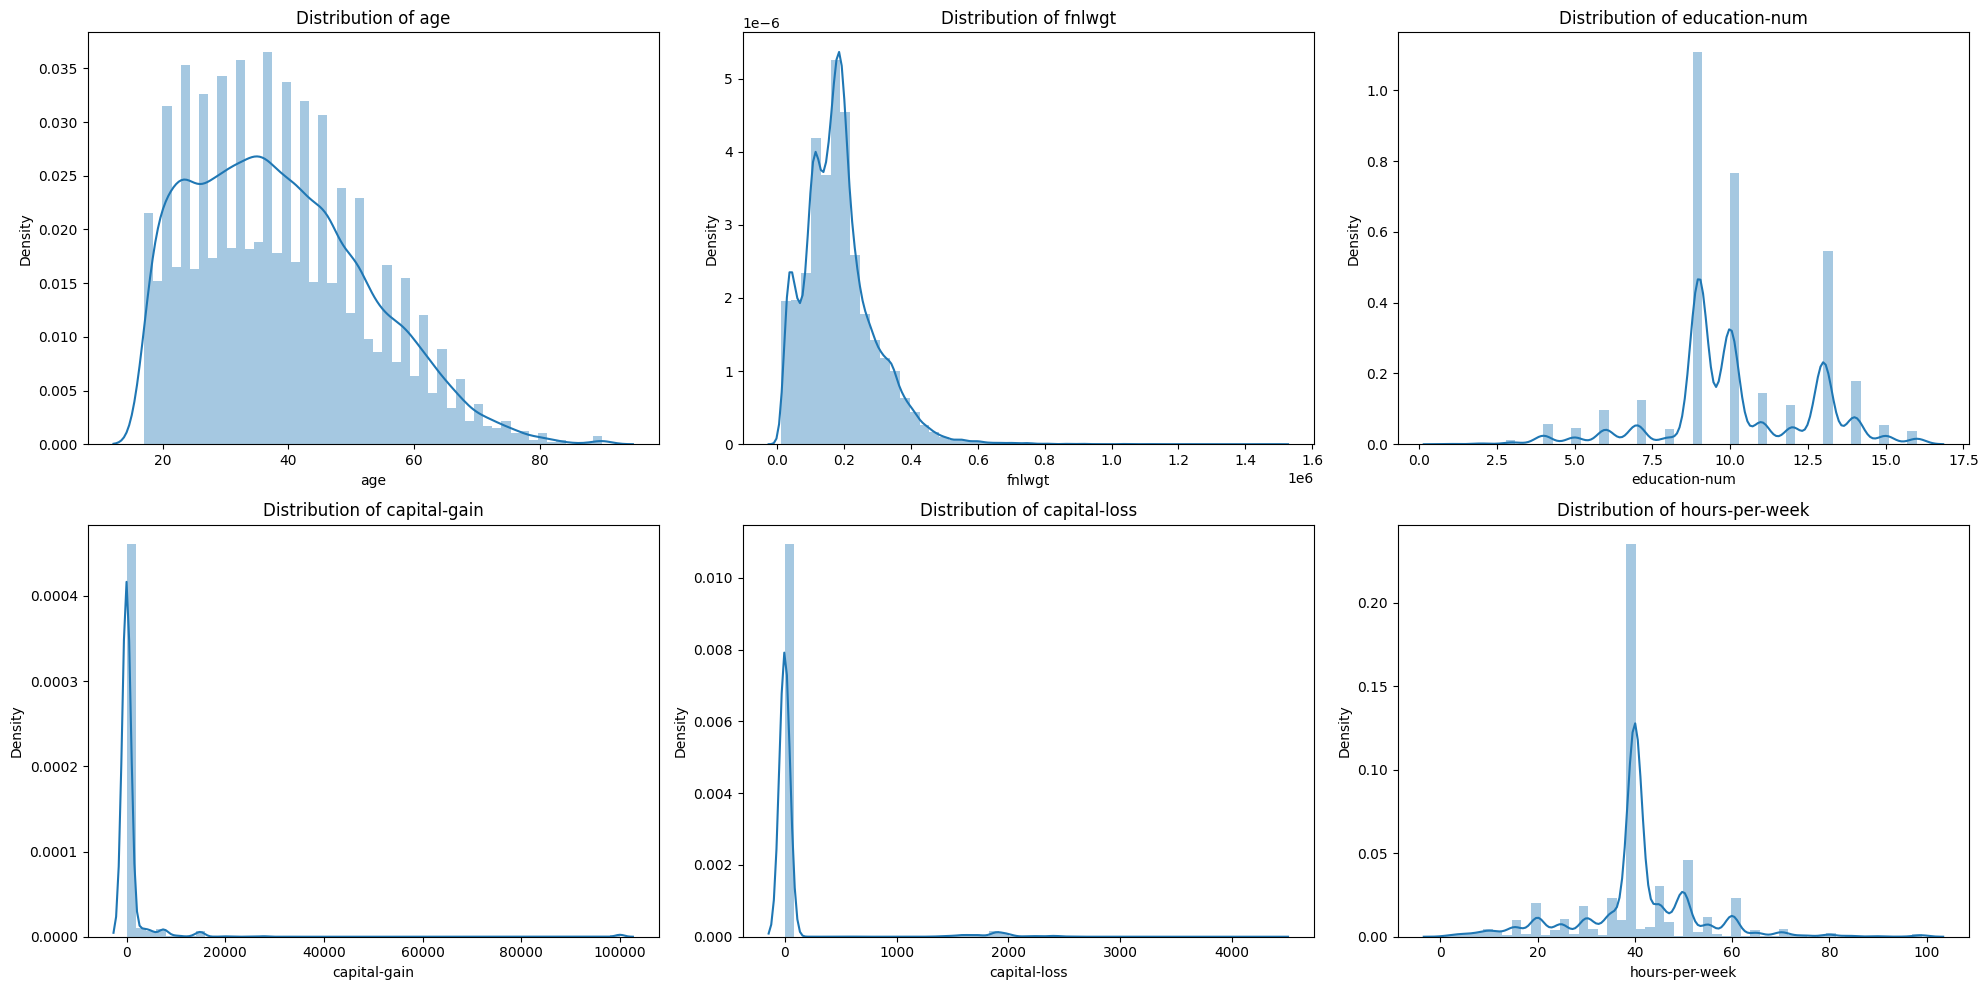

In [35]:
t = 1
for c1 in num1:
  plt.subplot(2,3,t)
  sns.distplot(df1[c1])
  plt.title(f'Distribution of {c1}')
  t += 1
plt.tight_layout()
plt.show()

In [39]:
df1[num1].skew()

age                0.544063
fnlwgt             1.482089
education-num     -0.095807
capital-gain      11.867080
capital-loss       4.525115
hours-per-week     0.229816
dtype: float64

## Observations:

* In the US countries, majority of the working people lie in the age group 20 to 60.
* The capital-gain and capital-loss are highly skewed towards the right.
* Most people work for around 40 hours per week and rare people work for very high or low hours.

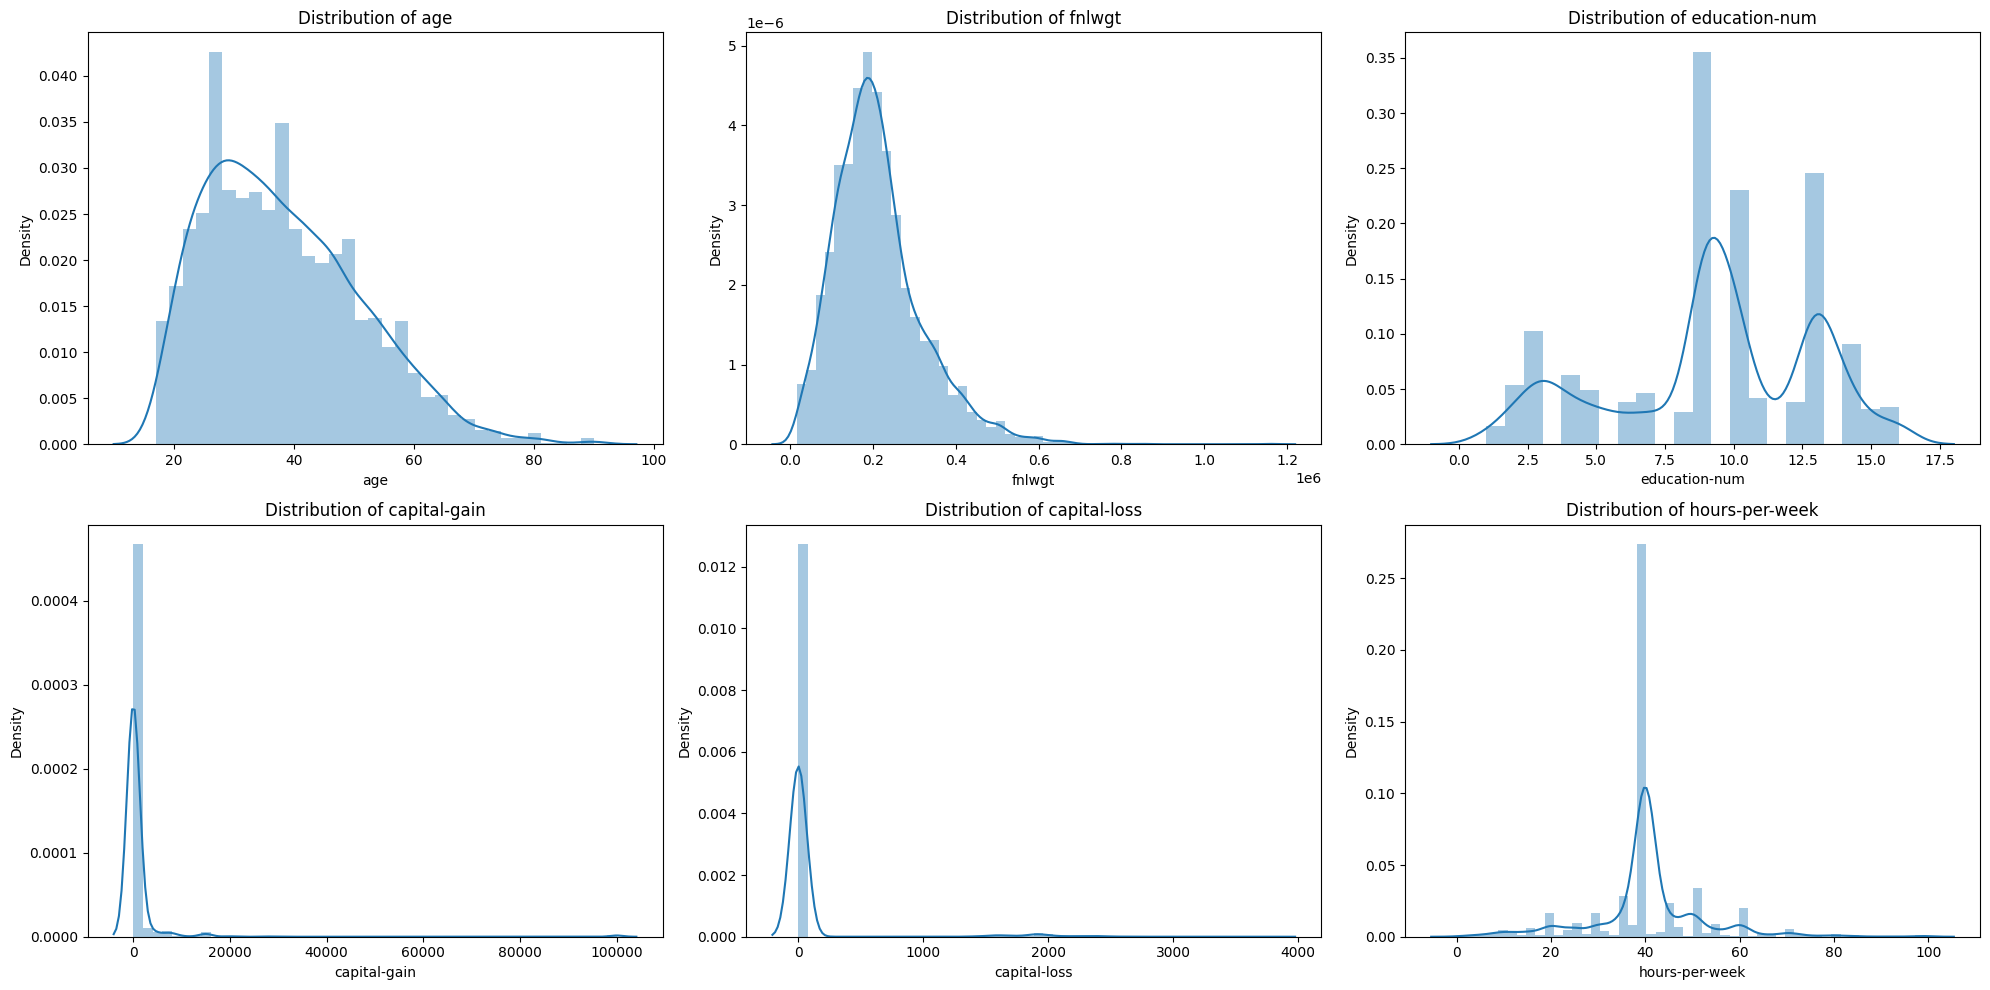

In [36]:
t = 1
for c2 in num2:
  plt.subplot(2,3,t)
  sns.distplot(df2[c2])
  plt.title(f'Distribution of {c2}')
  t += 1
plt.tight_layout()
plt.show()

In [38]:
df2[num2].skew()

age                0.673079
fnlwgt             1.158794
education-num     -0.430418
capital-gain      12.082308
capital-loss       4.981200
hours-per-week     0.337154
dtype: float64

## Observations:

* In the non-us countries, majority of the working people lie in the age group 20 to 60.
* Similar to US, the capital-gain and capital-loss are highly skewed towards the right.
* Most people work for around 40 hours per week and rare people work for very high or low hours.

## Conclusion:

* Both the US and the non US countries have similar distributions, but the US countries have more amount of younger employees as compared to the non US countries.

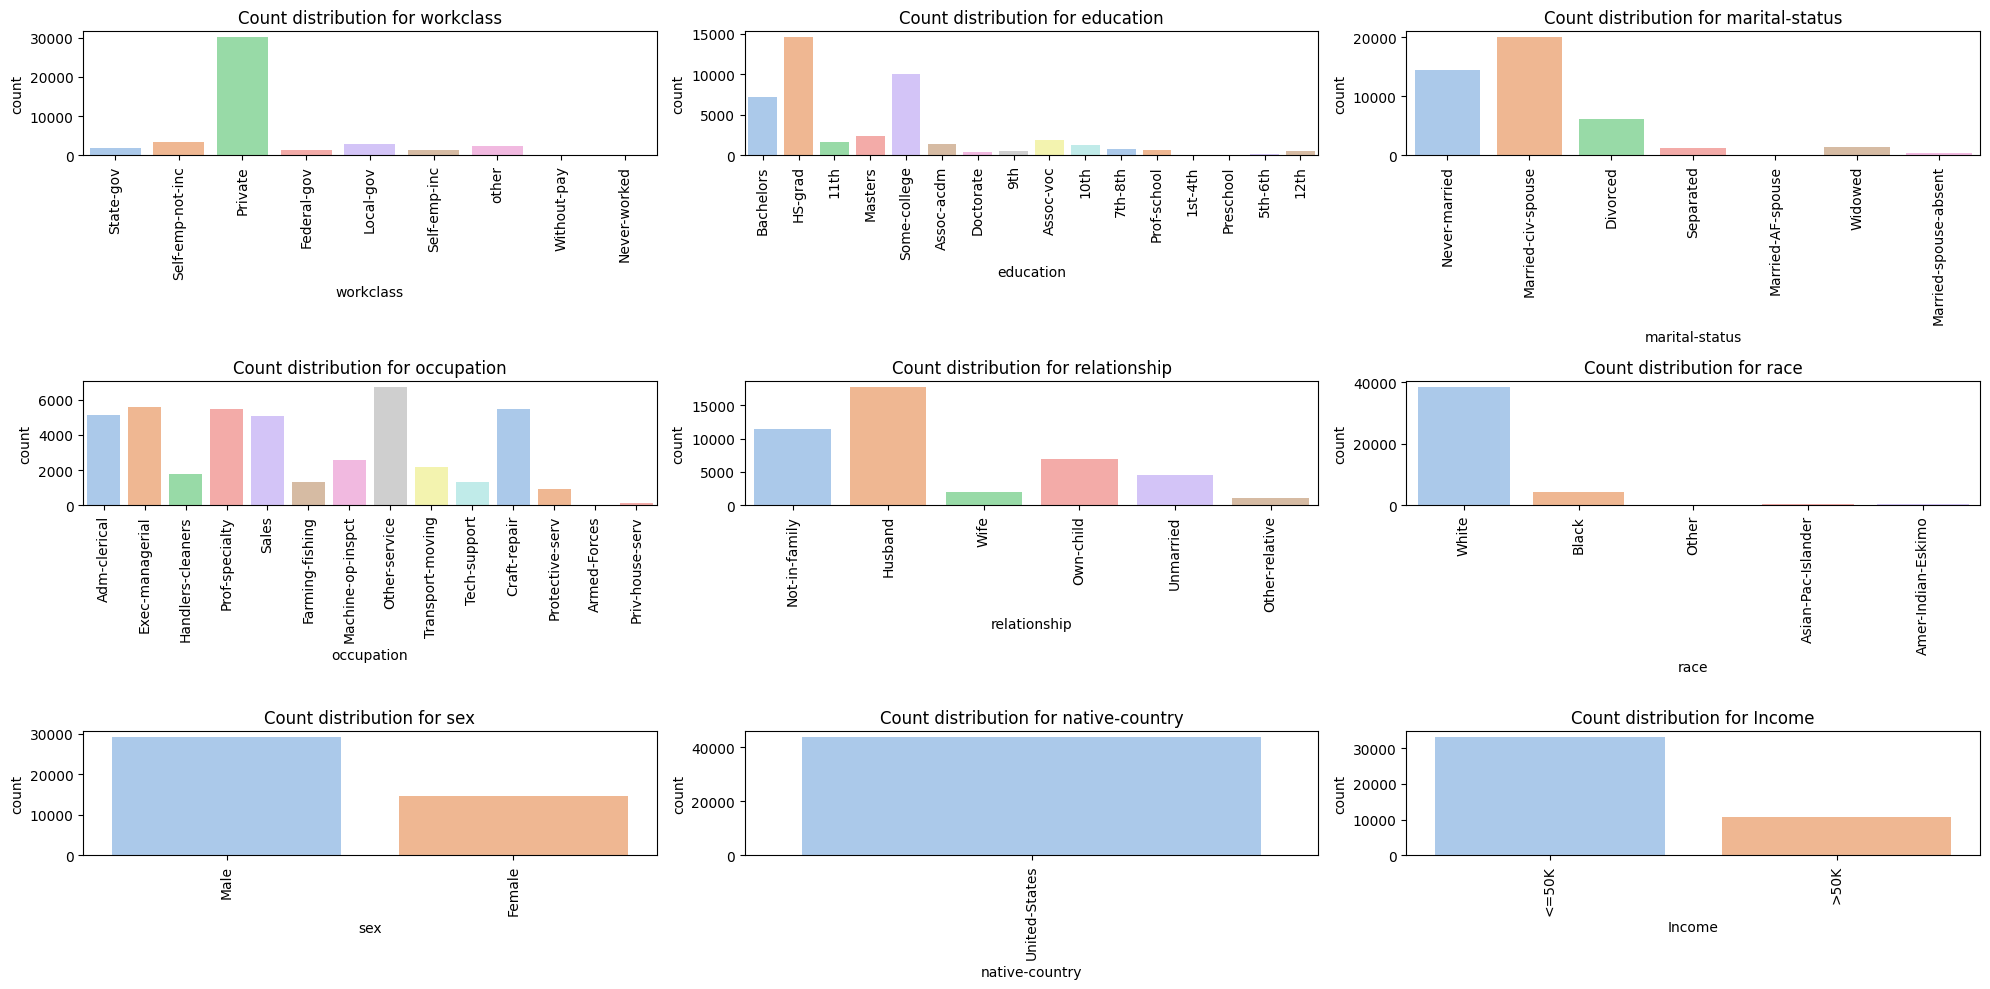

In [41]:
t = 1
for c1 in cat1:
  plt.subplot(3,3,t)
  sns.countplot(x=df1[c1], palette='pastel')
  plt.xticks(rotation=90)
  plt.title(f'Count distribution for {c1}')
  t += 1
plt.tight_layout()
plt.show()

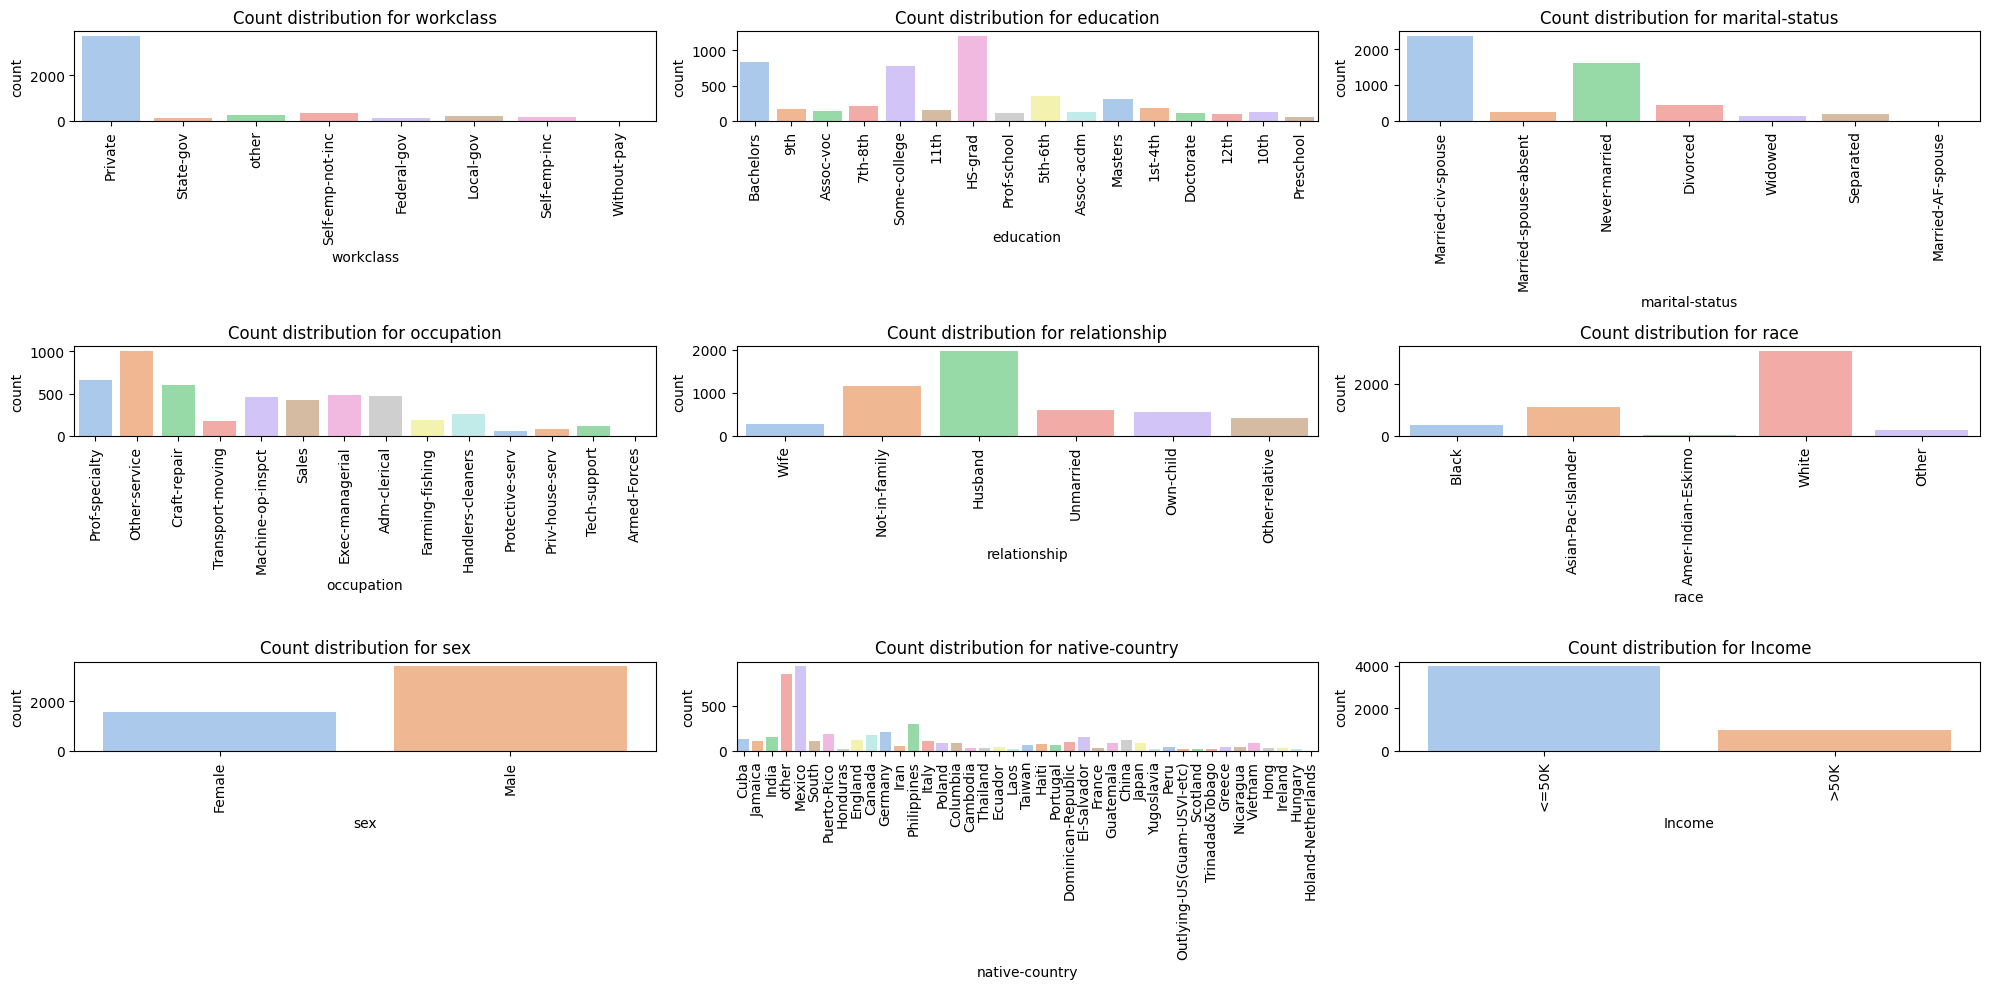

In [42]:
t = 1
for c2 in cat2:
  plt.subplot(3,3,t)
  sns.countplot(x=df2[c2], palette='pastel')
  plt.xticks(rotation=90)
  plt.title(f'Count distribution for {c2}')
  t += 1
plt.tight_layout()
plt.show()

## Observations:

* In both US and non US countries, most people work in the private workclass.
* The US countries have more people earning >50k as compared to the non US countries. Same thing with the <=50k category.
* In the non US countries, majority of the working people live in Mexico followed by other country.
* Both the country categories have more male employees as compared to female employees.

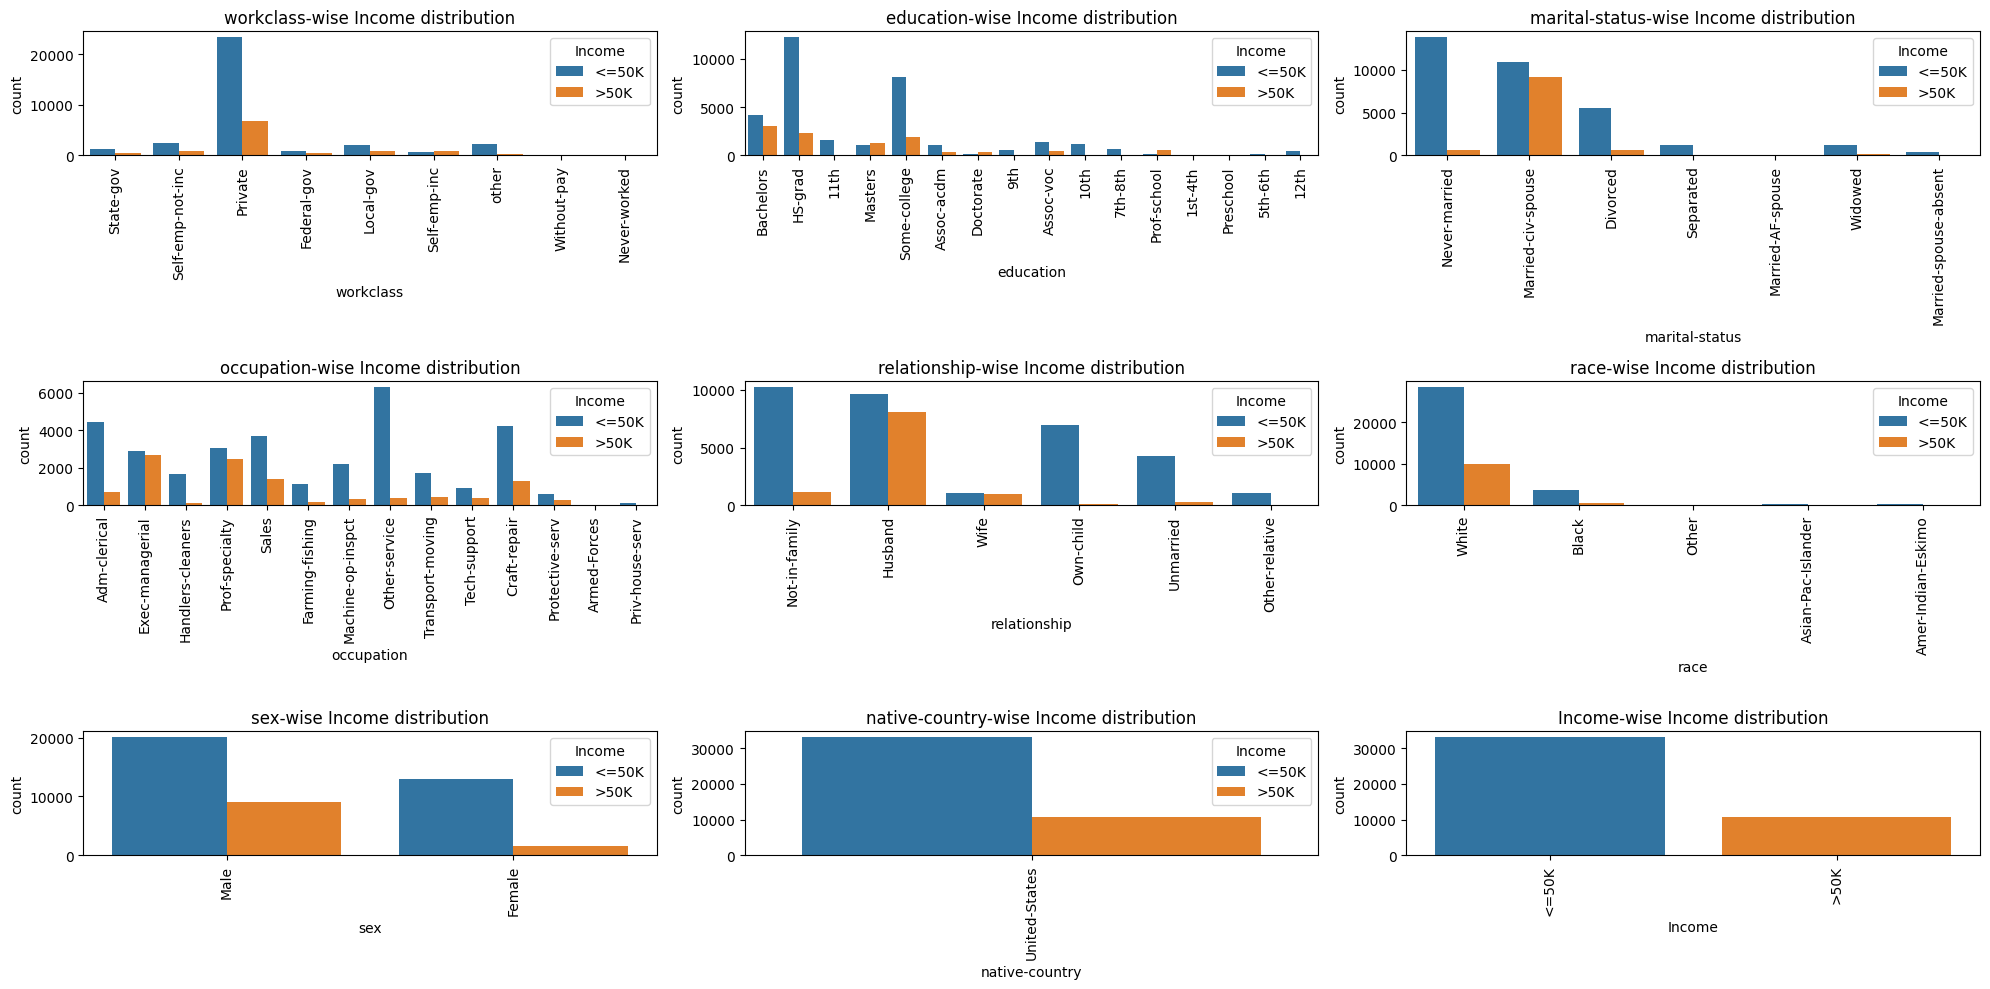

In [55]:
t = 1
for c1 in cat1:
  plt.subplot(3,3,t)
  sns.countplot(x=df1[c1],hue=df1['Income'])
  plt.title(f'{c1}-wise Income distribution')
  plt.xticks(rotation=90)
  t += 1
plt.tight_layout()
plt.show()

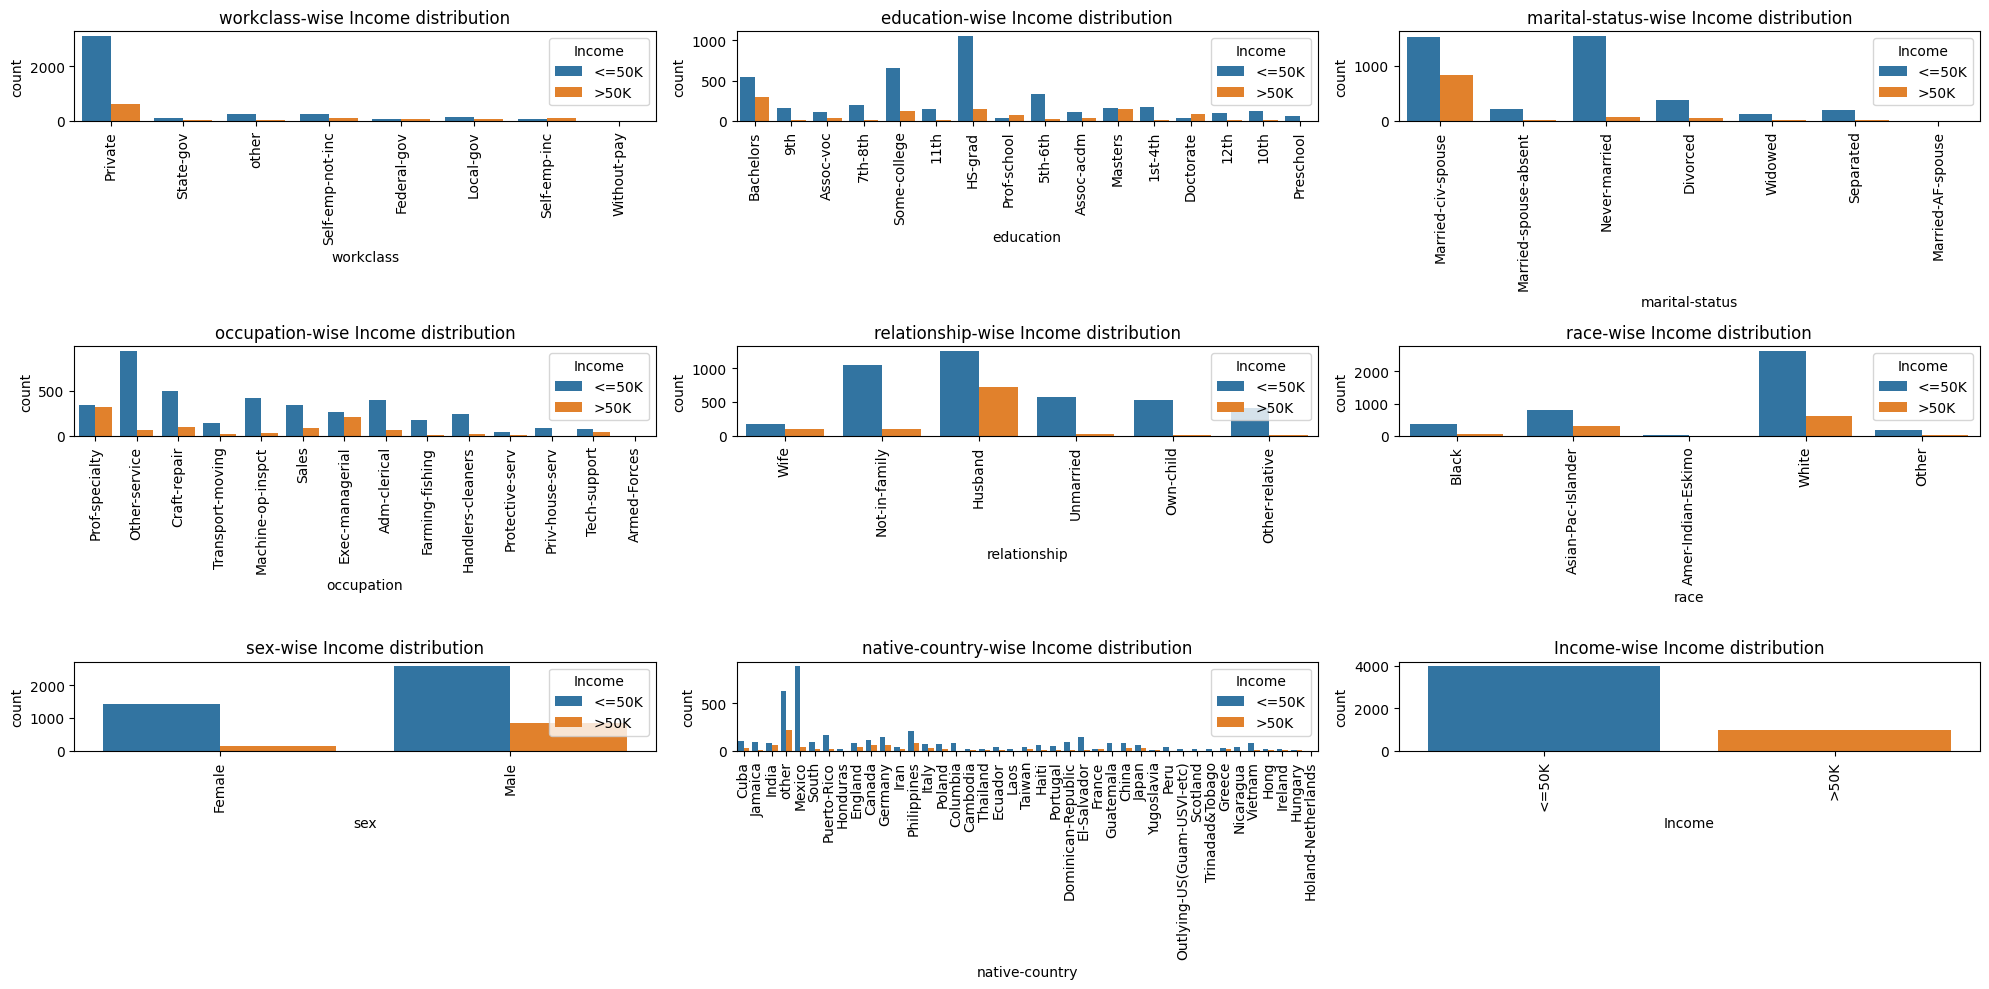

In [56]:
t = 1
for c2 in cat2:
  plt.subplot(3,3,t)
  sns.countplot(x=df2[c2],hue=df2['Income'])
  plt.title(f'{c2}-wise Income distribution')
  plt.xticks(rotation=90)
  t += 1
plt.tight_layout()
plt.show()

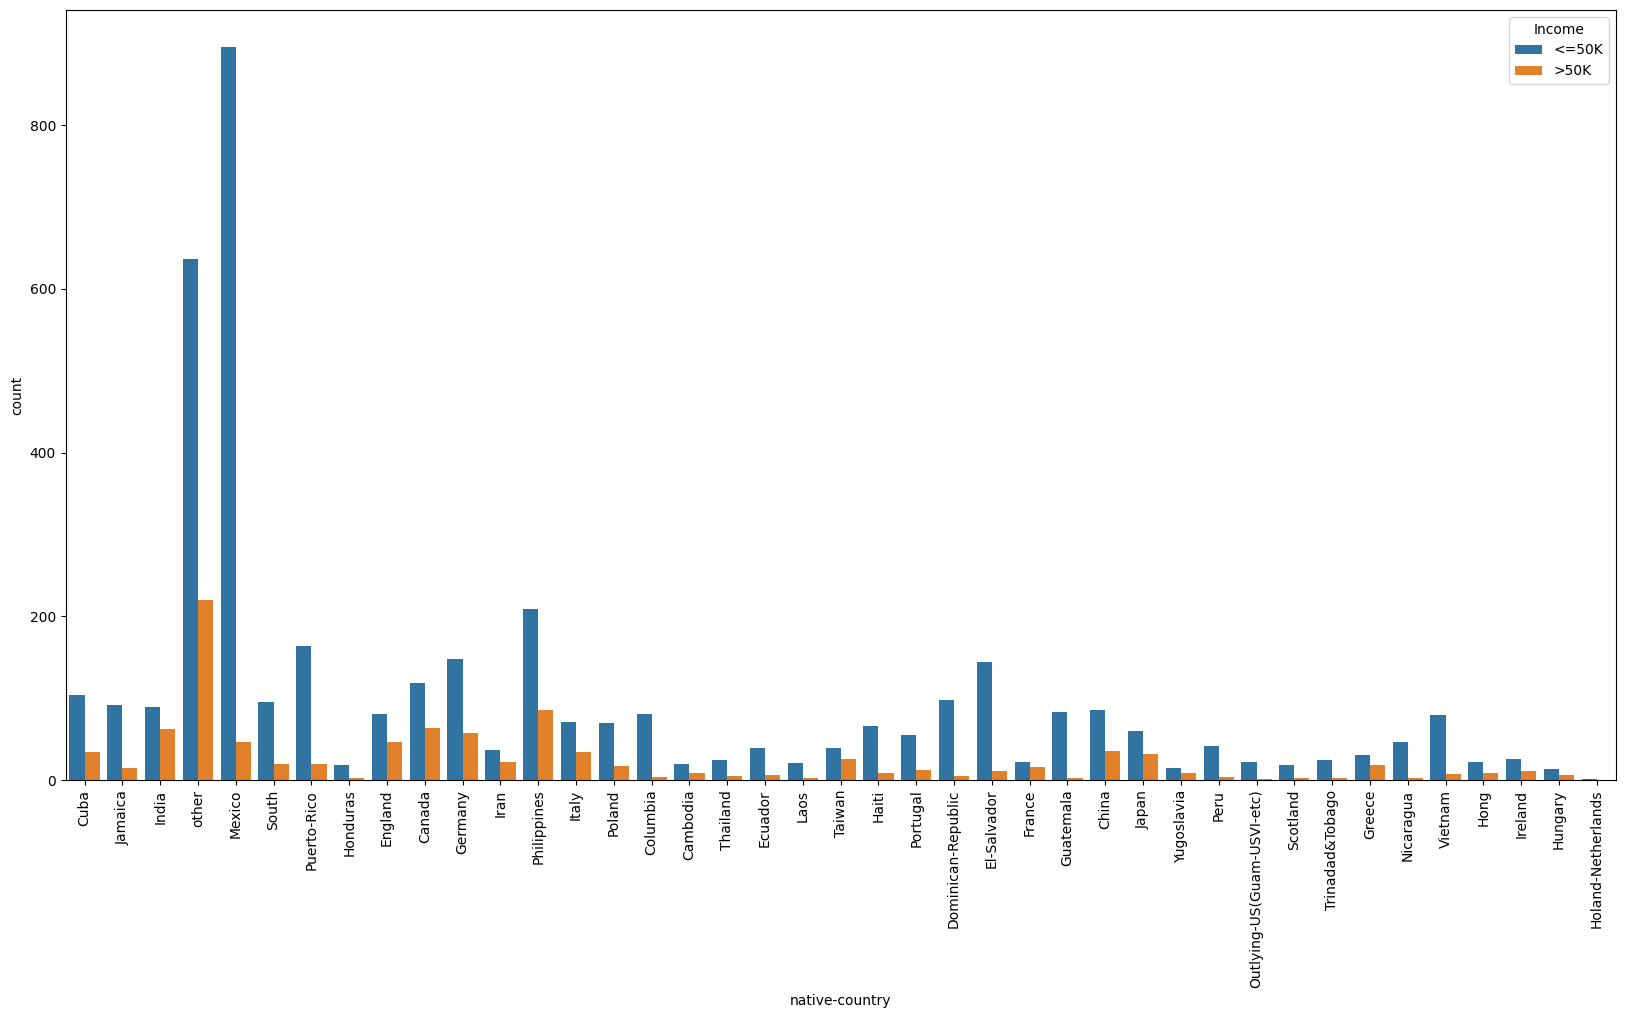

In [58]:
sns.countplot(x=df2['native-country'],hue=df2['Income'])
plt.xticks(rotation=90)
plt.show()

## Inference:

* In both the country groups, there is a huge difference between the number of employees earning greater than 50k and earning less than 50k in the private sector.
* In the non US countries, Mexico has the highest employees earining <=50k whereas other country has maximum employees earning >50k.
* There is a large imbalance in the income (target column) for both the country categories.